# Прогноз продаж компьютерных игр на следующий год

Из открытых источников получена база, содержащая исторические данные о продажах игр по разным регионам, оценки игр пользователеями и профессиональными экспертами, а также о жанрах игр, годах выпуска, платформах, для которых они выпускались, и о присвоенных играм возрастных рейтингах.

**Главной задачей в нашем случае является подготовка базы данных для прогноза продаж игр на следующий 2017 год**.

В рамках решения этой задачи предстоит оценить динамику выпуска новых игр в целом, динамику выпуска новых игр для конкретных платформ, выявить самые перспективные, с точки зрения продаж в 2017 году, платформы, выявить жанровые предпочтения глобального рынка и отдельных его макросегментов, а также оценить влияние на продажи отзывов пользователей и экспертов и возрастных рейтингов.

Кроме того, поставлена задача проверки двух гипотез, связанных с пользовательскими оценками 1). игр на разных платформах и 2). игр разных жанров.

## Загрузка данных

Формируем датасет из файла с данными и смотрим что получилось.

In [1]:
import pandas as pd

from matplotlib import pylab as plt

In [2]:
data = pd.read_csv(r'C:\users\Sony\games\games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a id="preprocessing"> </a>
## Предобработка данных

Датасет сформирован корректно. Есть пропуски.

Перед началом работы с пропусками переведем названия столбцов к нижнему регистру.

### Названия столбцов

In [5]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Названия столбцов приведены к нижнему регистру.

Теперь посмотрим, что такое две игры без названия.

### Игры без названия

In [6]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Прекрасно! Выходит, что они же - две игры без жанра. Выбрасываем эти строки.

In [7]:
data = data.dropna(subset='name')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Ровно тот результат, что и ожидался. Две строки выбросили.

Переходим к столбцу "год выпуска". Посмотрим, что там есть.

### Столбец "Год выпуска" (начало)

In [8]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Аномалий не видно. Не подходящий формат - лучше перевести в целые числа. Посколько в столбце есть пропуски, обычным приемом это сделать не получается. Найдем решение в stackoverflow.

In [9]:
data = data.astype({'year_of_release': "Int32"})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(5), object(5)
memory usage: 1.5+ MB


In [10]:
data['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int32

Формат поменялся. Но, 269 пропусков в столбце. Пока не будем выбрасывать или заменять пропуски на что-то. Вернемся к этому вопросу позже.

Сейчас посмотрим, сколько игр выпускалось по годам. Это - одна из задач исследовательсткой части проекта, и ее уже можно решить.

### Выпуск новых игр по годам

<AxesSubplot:title={'center':'Выпуск игр по годам'}, xlabel='year_of_release'>

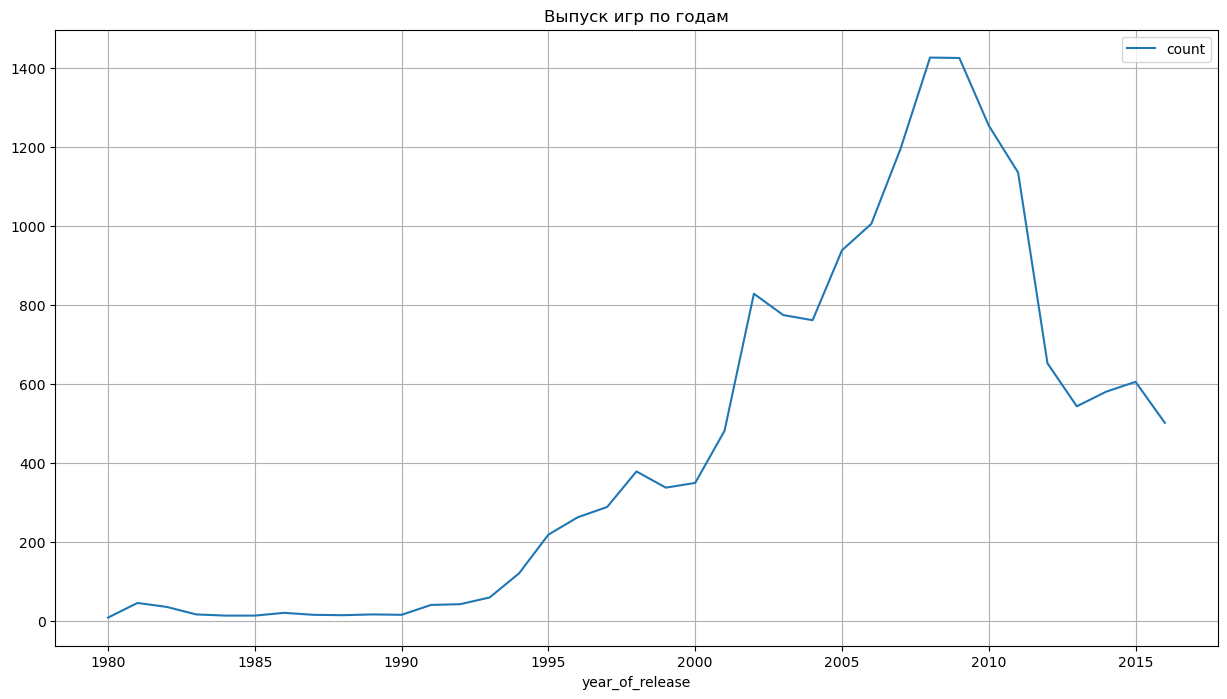

In [11]:
data.groupby('year_of_release')['year_of_release'].agg(['count']).\
    plot(figsize = (15, 8), title = 'Выпуск игр по годам', grid = True)

Таким образом, можно утверждать, что рост индустрии компьютерных ирг начался в 1993 году. Падение количества релизов в 1999 году, очевидно, стало следствием мирового финансового кризиса 1998 г. С 2001 года рост возобновился и даже ускорился. На пике, в 2008 и 2009 гг. в год выходило более 1400 новых игр.

Правда в 2008 году начался очередной глобальный экономический кризис. Пик релизов в 2008-2009 гг. объясняется тем, что на рынок вышли игры, разработка которых началась до кризиса. Но, уже к 2013 году, реагируя на кризис, рынок новых игр сократился до уровня десятилетней давности.

Вернемся к пропускам. Следующий столбец у нас - оценка критиков. Пропусков здесь - больше половины. Посмотрим, что там.

### Столбец "Оценка критиков" (начало)

In [12]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Аномалий нет.

Что делать с пропусками?

**Идея такая: оценка критиков и оценка пользователей должна быть прямо связна с объемом продаж. Пропуски в столбцах с оценками мы будем менять в привязке от объемам продаж игры**

Делаем столбец с общими продажами

### Столбец "Общие продажи" и корреляция общих продаж с оценками критиков

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Таблица, похоже, **уже упорядочена** по убыванию общих продаж. Во всех видимых строках пропуски есть и в оценках и в рейтинге. При этом большинство строк с попусками относятся к очень старым играм, и, вероятно, к старым платформам. Тогда, скорее всего, просто не существовало рейтингов и систем оценок игры. Проверим...

In [14]:
data.groupby('year_of_release')['critic_score'].agg('count') # The count() method returns the number of non-NaN values 

year_of_release
1980      0
1981      0
1982      0
1983      0
1984      0
1985      1
1986      0
1987      0
1988      1
1989      0
1990      0
1991      0
1992      1
1993      0
1994      1
1995      0
1996      8
1997     17
1998     28
1999     39
2000    143
2001    326
2002    627
2003    585
2004    561
2005    655
2006    620
2007    692
2008    715
2009    651
2010    500
2011    500
2012    321
2013    273
2014    261
2015    225
2016    232
Name: critic_score, dtype: int64

Да, до 1996 года практики оценки игр критиками, можно считать, не было.

Посмотрим на корреляцию оценок критиков и общих продаж игры. То есть, насколько адекватна наше предположение по замене пропусков из предыдущего раздела.

In [15]:
data['critic_score'].corr(data['total_sales'])

0.2455066871773633

Посмотрим по отдельным платформам

In [16]:
data.query('platform == "PS"')['critic_score'].corr(data.query('platform == "PS"')['total_sales'])

0.4456399858624238

In [17]:
data.query('platform == "PS2"')['critic_score'].corr(data.query('platform == "PS2"')['total_sales'])

0.3954345494545488

In [18]:
data.query('platform == "PS4"')['critic_score'].corr(data.query('platform == "PS4"')['total_sales'])

0.4065679020617814

In [19]:
data.query('platform == "X360"')['critic_score'].corr(data.query('platform == "X360"')['total_sales'])

0.39373586530725824

In [20]:
data.query('platform == "XOne"')['critic_score'].corr(data.query('platform == "XOne"')['total_sales'])

0.4169983280084015

По конкретным платформам результат удовлетворительный - связь скорее есть, чем нет...

### Столбец "Оценка пользователей" (начало)

Выведем корреляцию между оценками пользователей и объемом продаж. Только у нас оценки пользователей имеют тип "object". Посмотрим, что там "object".

In [21]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть числа, есть пропуски. И еще - некое 'tbd'.

По всей видимости, tbd - аббревиатура от to be defined/determined. То есть оценка находится в процессе определения.

Для новейших игр, выпущенных в 2016 году tbd равносильно пропуску (NaN), поскольку еще не успели сформировать оценку.

Для остальных игр tbd тоже равносильно пропуску - определяли и не смоли или не захотели определить пользовательскую оценку.

Соотвественно, в столбце пользовательских оценок меняем tbd на пропуск.

In [22]:
import numpy as np

In [23]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int32(1), float64(6), object(5)
memory usage: 1.6+ MB


После того, как выбросили tbd, оказалось, что пользовательских оценок даже меньше, чем оценок критиков. Это нормально - критики за оценки деньги получают, а пользователи - нет.

Без tbd можно поменть формат данных в столбце пользовательских оценок. Это float.

In [25]:
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.6+ MB


Все отлично поменялось. Смотрим корреляцию.

In [26]:
data['user_score'].corr(data['total_sales'])

0.08817911987579129

Слабенько. Связи практически нет. Посмотрим по платформам...

In [27]:
data[data['platform'].isin(['PS','PS4','PS2','XOne','X360'])] \
    .groupby('platform')[['user_score','critic_score']] \
    .corrwith(data['total_sales']).round(2)

,user_score,critic_score
platform,,
PS,0.30,0.45
PS2,0.17,0.40
PS4,-0.03,0.41
X360,0.11,0.39
XOne,-0.07,0.42


Нет связи, можно сказать...

### Исключение "старых" строк и строк с большим количеством пропусков и минимальными продажами

Для задач настоящего исследования старые данные не имеют ценности. Для начала исключим данные по играм, вышедшим до 2000 года (как было показано выше, до 2000 года рынок игр реально нельзя сравнивать с сегодняшним).

Сделаем функцию для выбрасывания строк, удовлетворяющих некоему условию.

In [28]:
def del_row_cond(dataframe, condition_to_del):
    index_out = dataframe.loc[condition_to_del].index
    dataframe = dataframe.drop(index_out)
    return dataframe

In [29]:
data = del_row_cond(data, data['year_of_release'] < 2000)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14739 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14739 non-null  object 
 1   platform         14739 non-null  object 
 2   year_of_release  14470 non-null  Int32  
 3   genre            14739 non-null  object 
 4   na_sales         14739 non-null  float64
 5   eu_sales         14739 non-null  float64
 6   jp_sales         14739 non-null  float64
 7   other_sales      14739 non-null  float64
 8   critic_score     8041 non-null   float64
 9   user_score       7498 non-null   float64
 10  rating           9844 non-null   object 
 11  total_sales      14739 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.4+ MB


Выбросилось много, но это все равно были бесполезные данные.

Выведем нижнюю часть датафрейма.

In [30]:
data.tail(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.0,67.0,NaN,E,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T,0.01
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.0,53.0,NaN,E,0.01
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.0,48.0,NaN,E,0.01
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.0,NaN,NaN,E,0.01


Здесь у нас игры, которые практически не продаются. И они, что закономерно, не оцениваются. Данные по таким играм мы тоже исключаем. За исключением новейших ирг, выпущенных в 2016 году. Критерий исключения: нет оценки критиков и суммарное количество проданных копий - менее 0,05 млн. 

In [31]:
data = del_row_cond(data, (data['critic_score'].isna()) &
                    (data['total_sales'] < 0.05) &
                    (data['year_of_release'] < 2016))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12763 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12763 non-null  object 
 1   platform         12763 non-null  object 
 2   year_of_release  12494 non-null  Int32  
 3   genre            12763 non-null  object 
 4   na_sales         12763 non-null  float64
 5   eu_sales         12763 non-null  float64
 6   jp_sales         12763 non-null  float64
 7   other_sales      12763 non-null  float64
 8   critic_score     8041 non-null   float64
 9   user_score       7403 non-null   float64
 10  rating           9453 non-null   object 
 11  total_sales      12763 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.2+ MB


In [32]:
data.tail(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16663,E.T. The Extra-Terrestrial,GBA,2001,Action,0.01,0.00,0.00,0.0,46.0,2.4,E,0.01
16669,Super Robot Taisen: Original Generation,GBA,2002,Role-Playing,0.01,0.00,0.00,0.0,72.0,NaN,T,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.0,NaN,NaN,M,0.01
16673,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,0.01,0.00,0.00,0.0,81.0,8.8,M,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16680,Kyoukai no Shirayuki,PSV,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16684,7'scarlet,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.0,80.0,7.6,M,0.01
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.0,67.0,NaN,E,0.01


Мы посмотрели хвост таблицы и убедились, что выбросилось все, что должно было выброситься. Пропуски в оценках и рейтинге игр, вышедших в 2016 году, мы оставим, поскольку эти пропуски логичны.

Теперь проверяем идею о связи оценки критиков с объемами продаж и решаем как заменять пропуски.

### Столбцы "Оценка критиков" и "Оценка пользователей" (продолжение)

Построим диаграмму рассеяния оценок критиков от объемов продаж.

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

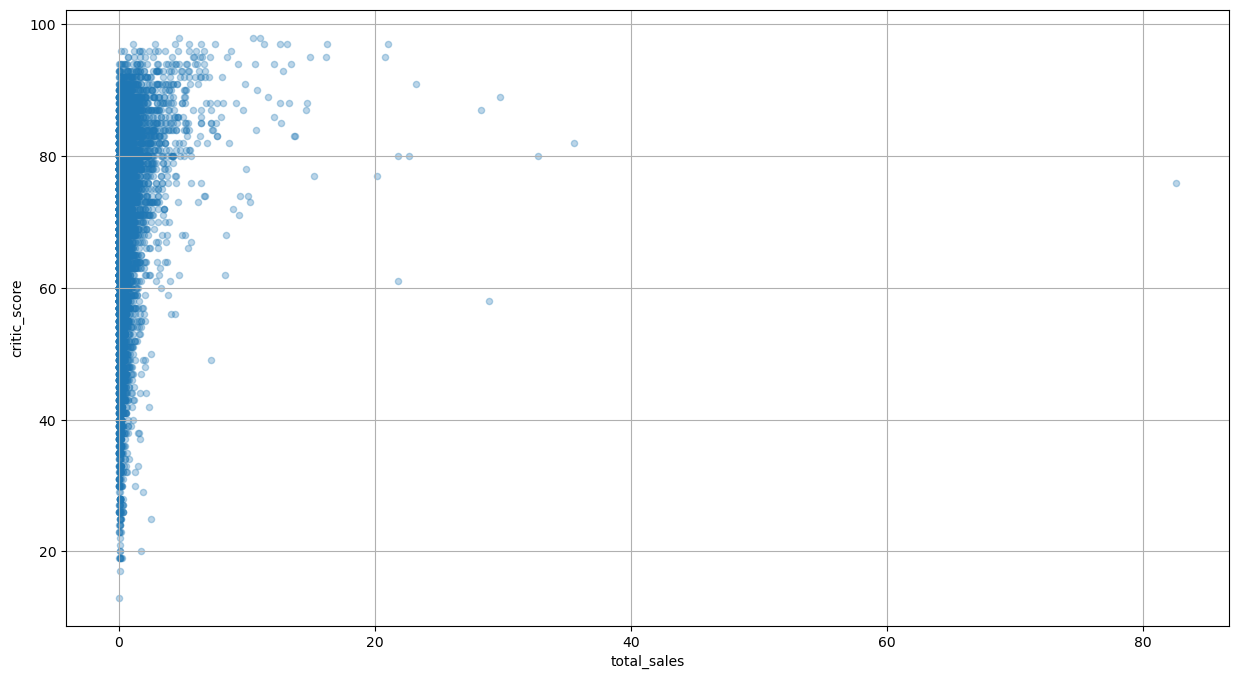

In [33]:
data.plot(x='total_sales', y='critic_score', kind='scatter', figsize=(15, 8), grid=True, alpha=0.3)

То же самое для оценок пользователей.

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

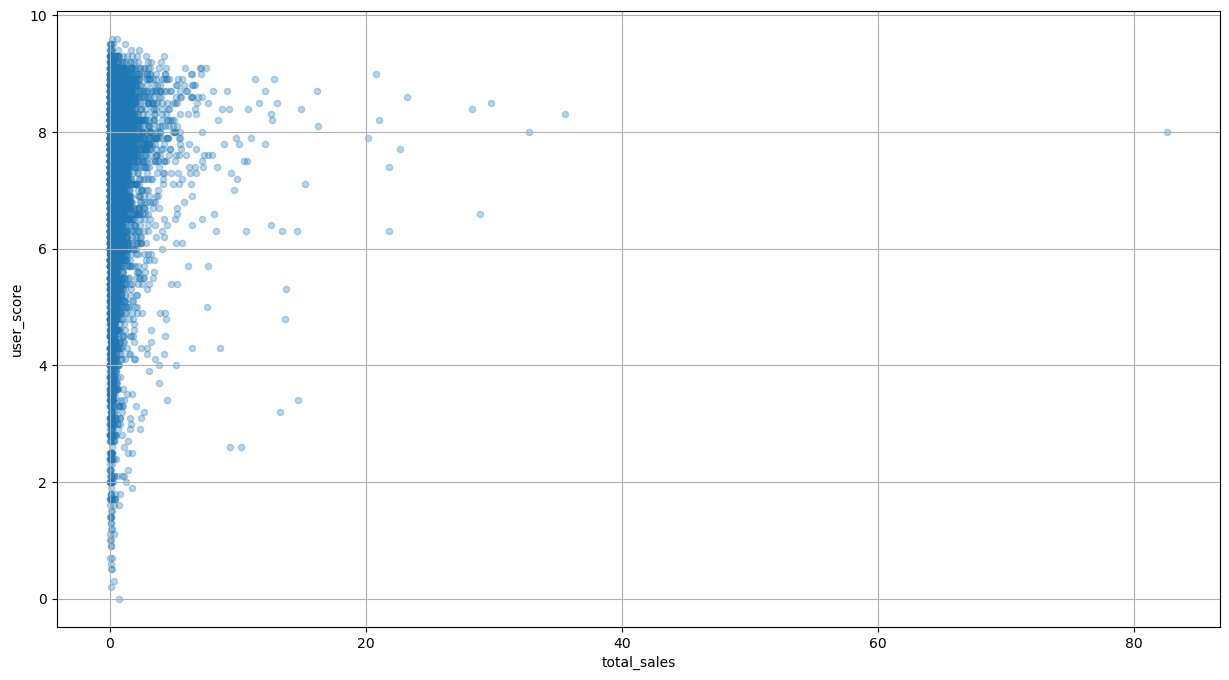

In [34]:
data.plot(x='total_sales', y='user_score', kind='scatter', figsize=(15, 8), grid=True, alpha=0.3)

Ничего не понятно - масштаб не подходит.

Зато видно, что игр с продажами более 20 млн копий - очень мало, штук 15 примерно. То есть это, по сути, аномалии, выбросы. 

Проверим есть ли в этой группе пропуски в оценках критиков.

In [35]:
data.query('total_sales > 20 and critic_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67


Есть. Достаточно старая игра. Мы ее выбросим.

In [36]:
data = data[(data['name'] != 'Nintendogs')]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12762 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12762 non-null  object 
 1   platform         12762 non-null  object 
 2   year_of_release  12493 non-null  Int32  
 3   genre            12762 non-null  object 
 4   na_sales         12762 non-null  float64
 5   eu_sales         12762 non-null  float64
 6   jp_sales         12762 non-null  float64
 7   other_sales      12762 non-null  float64
 8   critic_score     8041 non-null   float64
 9   user_score       7403 non-null   float64
 10  rating           9453 non-null   object 
 11  total_sales      12762 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.2+ MB


Одна строка ушла. Посмотрим тоже самое с продажами от 10 до 20 млн.

In [37]:
data.query('10 < total_sales < 20')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,NaN,NaN,NaN,15.84
26,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,3.43,5.35,5.32,1.18,77.0,7.1,E,15.28
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62


Пропусков очень много. По непонятным причинам нет оценок у многочисленных игр про покемонов. Их выбрасывать не стоит, поскольку есть сравнительно новые игры про покемонов (2013 и 2014 гг.). Плюс к тому, суммарные продажи по группе "игры про покемонов" будут, очевидно, среди лидеров продаж игр. Нельзя их выбрасывать.

Волевое решение - найти оценки для игр про покемонов в интернете и забить пропуски вручную. Пока время есть...

In [38]:
data.loc[20, 'critic_score'] = 85
data.loc[20, 'user_score'] = 8.4

In [39]:
data.loc[25, 'critic_score'] = 90
data.loc[25, 'user_score'] = 8.3

In [40]:
data.loc[27, 'critic_score'] = 90
data.loc[27, 'user_score'] = 8.7

In [41]:
data.loc[33, 'critic_score'] = 92
data.loc[33, 'user_score'] = 8.7

In [42]:
data.loc[46, 'critic_score'] = 87
data.loc[46, 'user_score'] = 8.7

In [43]:
data.loc[47, 'critic_score'] = 78
data.loc[47, 'user_score'] = 8.2

In [44]:
data.loc[58, 'critic_score'] = 80
data.loc[58, 'user_score'] = 8.1
data.query('10 < total_sales < 20')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,85.0,8.4,NaN,18.24
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,90.0,8.3,NaN,15.84
26,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,3.43,5.35,5.32,1.18,77.0,7.1,E,15.28
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,90.0,8.7,NaN,15.13
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62


Минут 10 ушло. Для покемонов не жалко. Еще запомним, что рейтинг всех покемонов - "без ограничениий". И еще наблюдение -  пользовательлская оценка в нашей системе исчисления близка к 1/10 оценки критиков.

Осталось 2 пропуска в этом срезе. Алгоритм ясен - найдем значения в интернете.

In [45]:
data.loc[59, 'critic_score'] = 85
data.loc[59, 'user_score'] = 8.5

In [46]:
data.loc[31, 'critic_score'] = 90
data.loc[31, 'user_score'] = 8.1

In [47]:
data.query('10 < total_sales < 20')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,85.0,8.4,NaN,18.24
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,90.0,8.3,NaN,15.84
26,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,3.43,5.35,5.32,1.18,77.0,7.1,E,15.28
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,90.0,8.7,NaN,15.13
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,90.0,8.1,NaN,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62


Все. Остальное будем менять программными методами. Сейчас в учетом новых знаний заполним пропуски в рейтингах, где возможно - в "покемонах", "колл оф дьюти" и "супермарио".

### Столбец "Рейтинг" (начало)

 Найдем, что значат обозначения рейтингов в классификации ESRB.

* EC («Early childhood») — «Для детей младшего возраста» (от 3 лет)
* E («Everyone») — «Для всех» (от 6 лет)
* E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
* T («Teen») — «Подросткам» (от 13 лет)
* M («Mature») — «Для взрослых» (от 17 лет)
* AO («Adults Only 18+») — «Только для взрослых» (от 18 лет)

Все "покемоны", как отмечалось выше, имеют категорию Е. "Супермарио" по аналогии со строками без пропусков - тоже Е. "Колл оф..." - категория М.

In [48]:
data[(data['name'].str.contains("Pokemon")) & (data['rating'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,85.0,8.4,NaN,18.24
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,90.0,8.3,NaN,15.84
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,90.0,8.7,NaN,15.13
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,92.0,8.7,NaN,14.60
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,4.34,2.71,3.96,0.76,87.0,8.7,NaN,11.77
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,78.0,8.2,NaN,11.68
58,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,4.34,2.65,3.15,0.35,80.0,8.1,NaN,10.49
83,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,2.79,1.72,3.14,0.41,NaN,NaN,NaN,8.06
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
210,Pokemon Mystery Dungeon: Explorers of Time/Exp...,DS,2007,Role-Playing,1.83,1.19,1.54,0.37,NaN,NaN,NaN,4.93


In [49]:
data.loc[(data['name'].str.contains("Pokemon")) & (data['rating'].isna()), 'rating'] = 'E'

Теперь "супермарио"

Допускаем, что здесь могут быть искажения (не все игры про Супермарио), но, ставим всем Е. Тем более, что часть строк мы еще вычистим по другим пропускам.

In [50]:
data.loc[(data['name'].str.contains("Mario")) & (data['rating'].isna()), 'rating'] = 'E'

Теперь Call of Duty. Всем - рейтинг М.

In [51]:
data.loc[(data['name'].str.contains("Duty")) & (data['rating'].isna()), 'rating'] = 'M'

Посмотрим, сколько пропусков осталост после ручной работы.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12762 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12762 non-null  object 
 1   platform         12762 non-null  object 
 2   year_of_release  12493 non-null  Int32  
 3   genre            12762 non-null  object 
 4   na_sales         12762 non-null  float64
 5   eu_sales         12762 non-null  float64
 6   jp_sales         12762 non-null  float64
 7   other_sales      12762 non-null  float64
 8   critic_score     8050 non-null   float64
 9   user_score       7412 non-null   float64
 10  rating           9512 non-null   object 
 11  total_sales      12762 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.7+ MB


Изменения практически незаметны, но важную часть информации мы сохранили.

Посмотрим на распределение общих продаж в оставшейся части датафрейма (<10 млн). Надо понять на что менять оставшиеся пропуски.

### Столбцы "Оценка критиков" и "Оценка пользователей" (продолжение)

Посмотрим корреляции оценок критиков и пользователей с общими продажами на срезе по общим продажам менее 10 млн.

In [53]:
data.query('total_sales < 10')['user_score'].corr(data.query('total_sales < 10')['total_sales'])

0.12212731935590769

In [54]:
data.query('total_sales < 10')['critic_score'].corr(data.query('total_sales < 10')['total_sales'])

0.3398054458795351

Корреляция по платформам. По оценкам пользователей и критиков.

In [67]:
data[data['platform'].isin(['PS','PS4','PS2','XOne','X360'])] \
    .groupby('platform')[['user_score','critic_score']] \
    .corrwith(data['total_sales']).round(5)

,user_score,critic_score
platform,,
PS,0.18700,0.30495
PS2,0.17234,0.39543
PS4,-0.00027,0.40035
X360,0.11390,0.39374
XOne,-0.07230,0.41700


Таким образом, менять пропуски в оценках критиков на основе общих продаж игры можно. А вот пропуски в оценках портебителей менять нельзя. Там связи вообще практически нет.

Посмотрим точечные диаграммы...

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

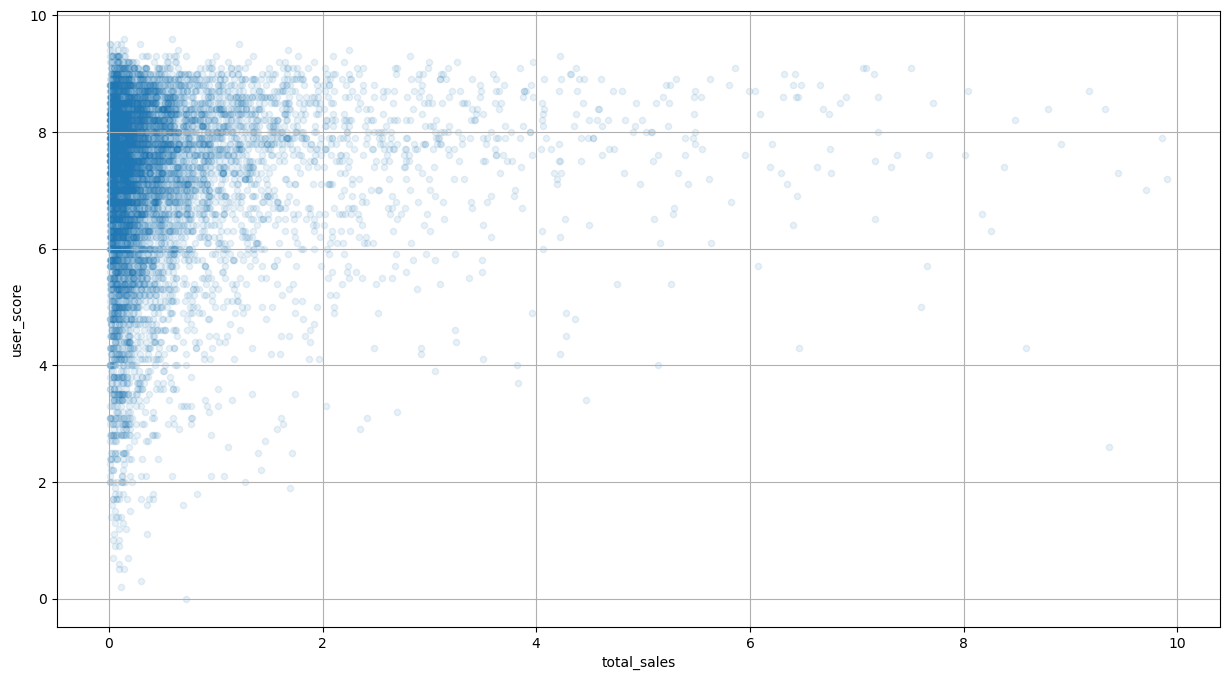

In [68]:
data.query('total_sales < 10').plot(x='total_sales', y='user_score', kind='scatter', figsize=(15, 8), grid=True, alpha=0.1)

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

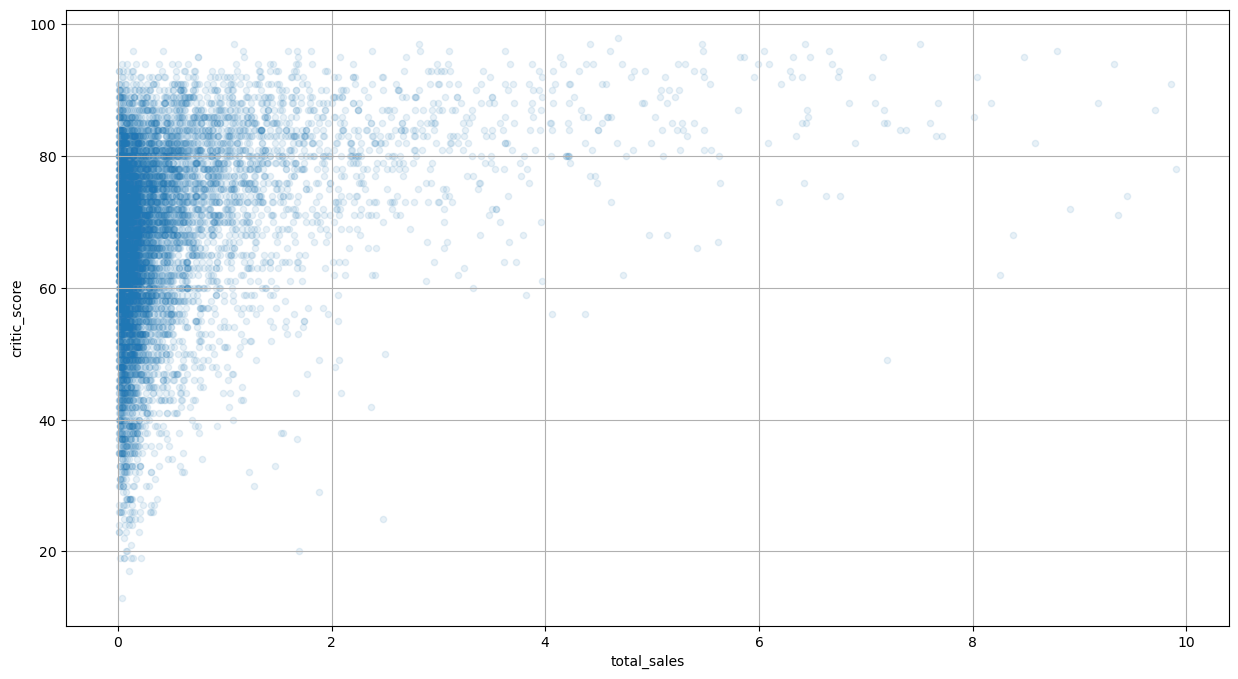

In [69]:
data.query('total_sales < 10').plot(x='total_sales', y='critic_score', kind='scatter', figsize=(15, 8), grid=True, alpha=0.1)

Визуально разница почти незаметна. Но коэффициент корреляции не оставляет выбора. Мы меняем пропуски в оценках критиков и оставляем как есть стоблец с оценками пользователей.

Гистограмму распределения продаж еще построим.

<AxesSubplot:>

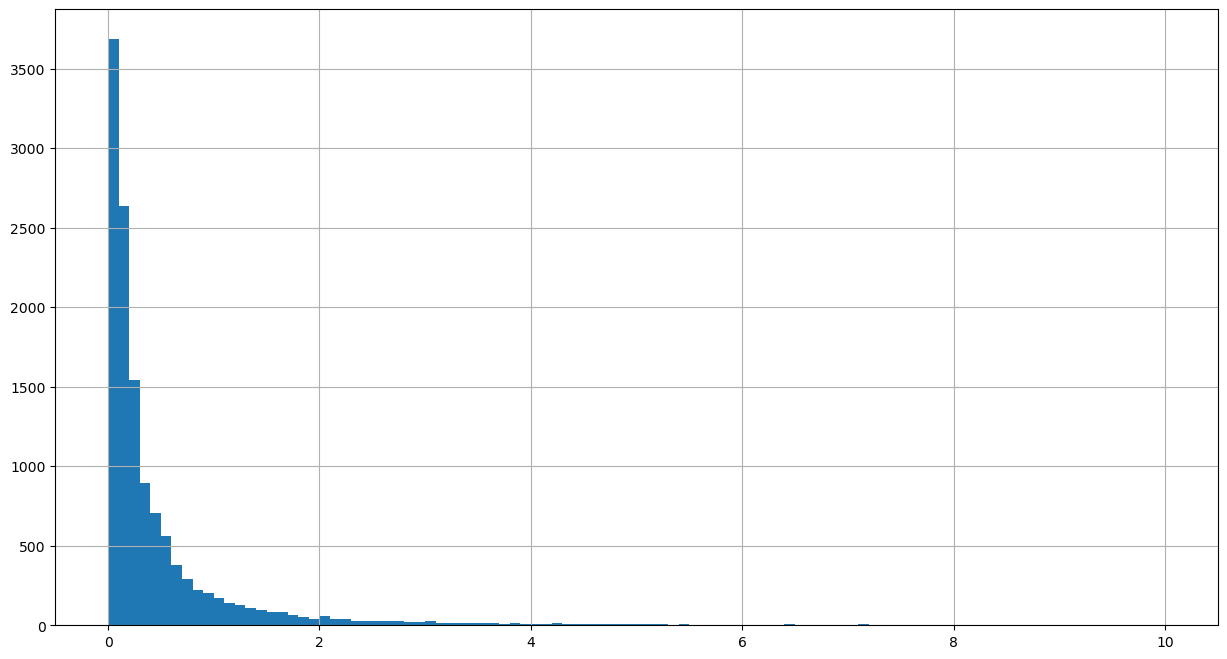

In [70]:
data['total_sales'].hist(bins=100, range=(0,10), figsize=(15,8))

Мы стараемся максимально корректно обрабатывать пропуски. Поэтому на основе анализа этих графиков мы выделяем следующие группы (по общим продажам), где пропуски по оценкам критиков будут меняться на медианное значение по группе: [5;10), [3;5), [2;3). Сделаем это, потом продолжим. Да, **имеющиесяя пропуски в оценках по играм 2016 года оставляем**.

Диапазон [5; 10):

In [71]:
data.loc[(data['total_sales'] < 10) & (data['total_sales'] >= 5)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
64,Halo: Reach,X360,2010,Shooter,7.04,1.95,0.08,0.79,91.0,7.9,M,9.86
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71
68,Just Dance 2,Wii,2010,Misc,5.80,2.85,0.01,0.78,74.0,7.3,E10+,9.44
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
...,...,...,...,...,...,...,...,...,...,...,...,...
198,Mario & Sonic at the Olympic Games,DS,2008,Sports,1.63,2.45,0.44,0.57,NaN,NaN,E,5.09
199,Resident Evil 5,PS3,2009,Action,1.96,1.41,1.08,0.64,84.0,7.5,M,5.09
200,The Legend of Zelda: Phantom Hourglass,DS,2007,Action,1.85,1.80,0.95,0.48,90.0,8.0,E,5.08
202,FIFA Soccer 11,PS3,2010,Sports,0.61,3.28,0.06,1.12,89.0,8.0,E,5.07


In [72]:
data.loc[(data['total_sales'] < 10) & (data['total_sales'] >= 5)\
         & (data['critic_score'].isna() & (data['year_of_release'] < 2016)), 'critic_score'] \
= data.loc[(data['total_sales'] < 10) & (data['total_sales'] >= 5)]['critic_score'].median()

Диапазон [3; 5):

In [73]:
data.loc[(data['total_sales'] < 5) & (data['total_sales'] >= 3)\
         & (data['critic_score'].isna() & (data['year_of_release'] < 2016)), 'critic_score'] \
= data.loc[(data['total_sales'] < 5) & (data['total_sales'] >= 3)]['critic_score'].median()

Диапазон [2; 3):

In [74]:
data.loc[(data['total_sales'] < 3) & (data['total_sales'] >= 2)\
         & (data['critic_score'].isna() & (data['year_of_release'] < 2016)), 'critic_score'] \
= data.loc[(data['total_sales'] < 3) & (data['total_sales'] >= 2)]['critic_score'].median()

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12762 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12762 non-null  object 
 1   platform         12762 non-null  object 
 2   year_of_release  12493 non-null  Int32  
 3   genre            12762 non-null  object 
 4   na_sales         12762 non-null  float64
 5   eu_sales         12762 non-null  float64
 6   jp_sales         12762 non-null  float64
 7   other_sales      12762 non-null  float64
 8   critic_score     8164 non-null   float64
 9   user_score       7412 non-null   float64
 10  rating           9512 non-null   object 
 11  total_sales      12762 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.7+ MB


Движемся медленно, но в правильном направлении - пропуски заполняются.

Посмотрим на графики по продажам менее 2 млн копий. То есть еще "приблизим" графики, которые мы строили выше

<AxesSubplot:>

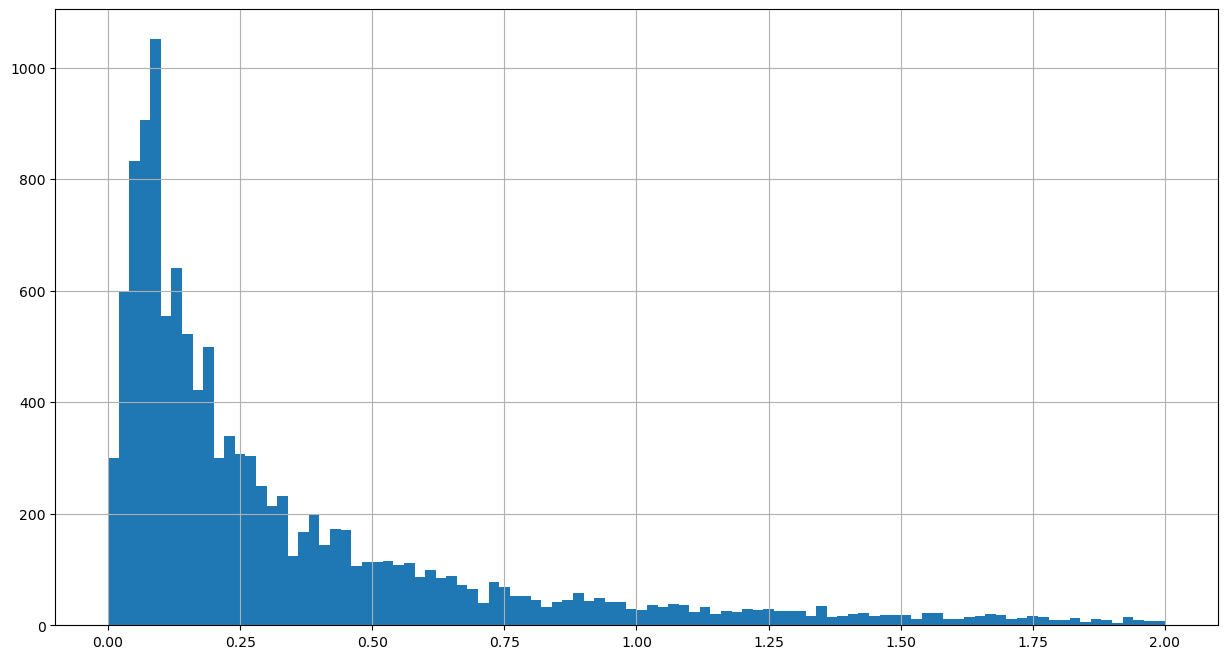

In [76]:
data['total_sales'].hist(bins=100, range=(0,2), figsize=(15,8))

Сначала выведем рассеяние оценок потребителей, потом - оценок критиков.

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

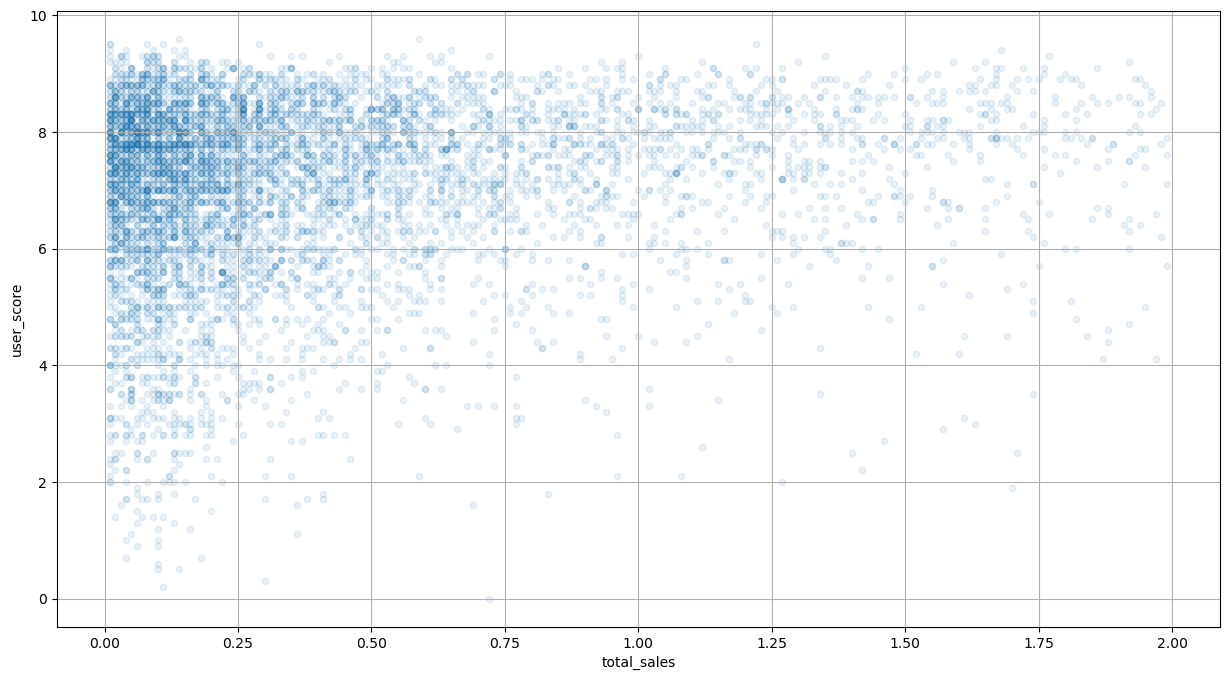

In [77]:
data.query('total_sales < 2').plot(x='total_sales', y='user_score', kind='scatter', figsize=(15, 8), grid=True, alpha=0.1)

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

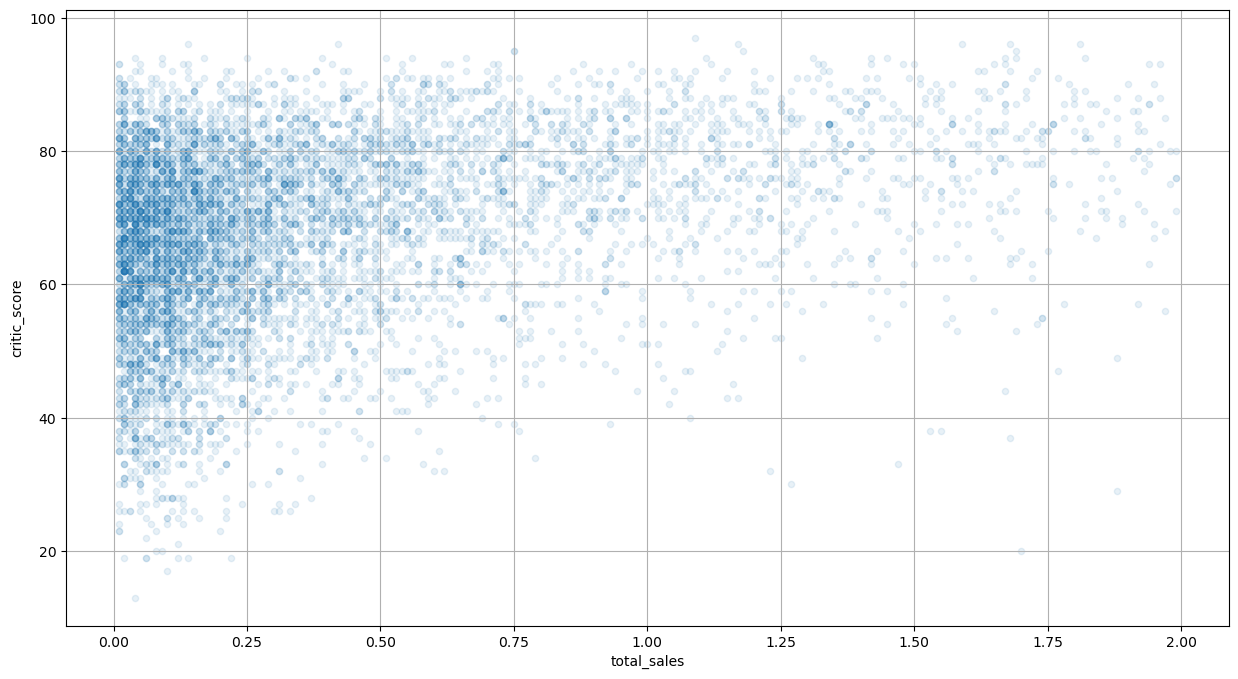

In [78]:
data.query('total_sales < 2').plot(x='total_sales', y='critic_score', kind='scatter', figsize=(15, 8), grid=True, alpha=0.1)

Выведем корреляции.

In [79]:
data.query('total_sales < 2')['user_score'].corr(data.query('total_sales < 2')['total_sales'])

0.12780976535640864

In [80]:
data.query('total_sales < 2')['critic_score'].corr(data.query('total_sales < 2')['total_sales'])

0.31168799268868874

Продолжаем заполнять пропуски в оценках критиков. И не трогаем оценки пользователей.

Посмотрим на квартили по общим продажам.

In [81]:
data.query('total_sales < 2')['total_sales'].describe()

count    12081.000000
mean         0.336322
std          0.384519
min          0.010000
25%          0.080000
50%          0.180000
75%          0.440000
max          1.990000
Name: total_sales, dtype: float64

Решение такое - будем менять пропуски в оценках критиков на медианные значения по алгоритму, реализованному выше, по следующим срезам (по общим продажам): [1;2), [0,19;1), [0;0,19).

Диапазон [1;2).

In [82]:
data.loc[(data['total_sales'] < 2) & (data['total_sales'] >= 1)\
         & (data['critic_score'].isna() & (data['year_of_release'] < 2016)), 'critic_score'] \
= data.loc[(data['total_sales'] < 2) & (data['total_sales'] >= 1)]['critic_score'].median()

Диапазон [0,19;1).

In [83]:
data.loc[(data['total_sales'] < 1) & (data['total_sales'] >= .19)\
         & (data['critic_score'].isna() & (data['year_of_release'] < 2016)), 'critic_score'] \
= data.loc[(data['total_sales'] < 1) & (data['total_sales'] >= .19)]['critic_score'].median()

Диапазон [0;,19)

In [84]:
data.loc[(data['total_sales'] < .19) & (data['critic_score'].isna() & (data['year_of_release'] < 2016)), 'critic_score'] \
= data.loc[(data['total_sales'] < .19)]['critic_score'].median()

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12762 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12762 non-null  object 
 1   platform         12762 non-null  object 
 2   year_of_release  12493 non-null  Int32  
 3   genre            12762 non-null  object 
 4   na_sales         12762 non-null  float64
 5   eu_sales         12762 non-null  float64
 6   jp_sales         12762 non-null  float64
 7   other_sales      12762 non-null  float64
 8   critic_score     12377 non-null  float64
 9   user_score       7412 non-null   float64
 10  rating           9512 non-null   object 
 11  total_sales      12762 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.7+ MB


Все пропуски в оценках игр критиками заполнены! Кроме пропусков по играм 2016 года - их мы оставили сознательно.

### Столбец "Рейтинг" (продолжение)

Пропуски по рейтингу ESRB... Мы попытаемся восстановить их основываясь на жанрах игр.

**Идея такая: выявить самый популярный рейтинг в этом жанре игр и его долю. Если доля больше 50% - будем менять пропуски рейтингов в этом жанре на самый популярный**. Если самый популярный рейтинг набирает меньше 50% - будем думать дальше.

In [86]:
for g in data['genre'].unique():
    display(g)
    display(data.loc[(data['genre'] == g), 'rating'].value_counts(normalize=True))
    display()

'Sports'

E       0.789761
T       0.126962
E10+    0.072355
M       0.010922
Name: rating, dtype: float64

'Racing'

E       0.660584
T       0.206813
E10+    0.110706
M       0.020681
RP      0.001217
Name: rating, dtype: float64

'Platform'

E       0.631295
E10+    0.253597
T       0.109712
M       0.005396
Name: rating, dtype: float64

'Misc'

E       0.512696
T       0.273277
E10+    0.193470
M       0.015719
EC      0.004837
Name: rating, dtype: float64

'Action'

T       0.311027
M       0.282281
E10+    0.221018
E       0.184731
AO      0.000471
EC      0.000471
Name: rating, dtype: float64

'Role-Playing'

T       0.526938
M       0.204993
E10+    0.143233
E       0.124836
Name: rating, dtype: float64

'Puzzle'

E       0.847973
E10+    0.125000
T       0.027027
Name: rating, dtype: float64

'Shooter'

M       0.570571
T       0.336336
E10+    0.052052
E       0.041041
Name: rating, dtype: float64

'Fighting'

T       0.825059
M       0.113475
E10+    0.044917
E       0.016548
Name: rating, dtype: float64

'Simulation'

E       0.561538
T       0.346154
E10+    0.082692
M       0.009615
Name: rating, dtype: float64

'Adventure'

E       0.358537
T       0.256098
M       0.226829
E10+    0.153659
EC      0.004878
Name: rating, dtype: float64

'Strategy'

T       0.479100
E10+    0.241158
E       0.192926
M       0.080386
RP      0.006431
Name: rating, dtype: float64

Итоги: Спорт = Е, Гонки = Е, Платформа = Е, Разное = Е, Экшн = нет ответа, Ролевые = Е, Паззлы = Е, Стрелялки = М, Борьба = Т, Симуляция = Е, Приключения = нет ответа, Стратегия = нет ответа.

Меняем!

In [88]:
for gg in ['Sports', 'Racing', 'Platform', 'Misc', 'Role-Playing', 'Puzzle', 'Simulation']:
    data.loc[(data['genre'] == gg) & (data['rating'].isna()), 'rating'] = 'E'

In [91]:
data.loc[(data['genre'] == 'Shooter') & (data['rating'].isna()), 'rating'] = 'M'
data.loc[(data['genre'] == 'Fighting') & (data['rating'].isna()), 'rating'] = 'T'

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12762 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12762 non-null  object 
 1   platform         12762 non-null  object 
 2   year_of_release  12493 non-null  Int32  
 3   genre            12762 non-null  object 
 4   na_sales         12762 non-null  float64
 5   eu_sales         12762 non-null  float64
 6   jp_sales         12762 non-null  float64
 7   other_sales      12762 non-null  float64
 8   critic_score     12377 non-null  float64
 9   user_score       7412 non-null   float64
 10  rating           11605 non-null  object 
 11  total_sales      12762 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.7+ MB


Поменяли. Остались без рейтинга 'Action', 'Adventure' и 'Strategy'. Посмотрим, что там.

In [93]:
data.loc[(data['genre'] == 'Action') & (data['rating'].isna())] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,84.0,NaN,NaN,4.72
259,The Legend of Zelda: Ocarina of Time,3DS,2011,Action,2.09,1.31,0.62,0.31,84.0,NaN,NaN,4.33
367,LEGO Star Wars: The Video Game,PS2,2005,Action,1.98,1.14,0.01,0.41,84.0,NaN,NaN,3.54
368,Rugrats in Paris: The Movie,PS,2000,Action,1.96,1.33,0.00,0.23,84.0,NaN,NaN,3.52
400,The Legend of Zelda: Majora's Mask,N64,2000,Action,1.90,0.67,0.73,0.06,84.0,NaN,NaN,3.36
...,...,...,...,...,...,...,...,...,...,...,...,...
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16680,Kyoukai no Shirayuki,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


680 штук.

Этот срез датафрейма представляется интересным. В хвосте среза мы видим группу новых (релиза 2016 г.) игр, которые продаются только в Японии. Насколько логичен этот результат?

Для ответа на этот вопрос необходимо понять, что такое рейтинг ESRB, которым мы здесь оперируем.

Поиск по открытым источникам показал, что, во-первых, производители не обязаны предоставлять игру на определение рейтинга до начала официальных продаж. То есть отсуствие рейтинга для "новых" игр (в нашем случае - для игр, вышедших в 2016 г.) - абсолютно нормальная ситуация. Эти пропуски можно оставить. Во-вторых, что ESRB - рейтинг США и Канады. Это значит, что отсутствие рейтинга - абсолютно нормальная ситуация для всех игр, которые не продаются в США и Канаде. У нас нет данных по продажам в США и Канаде - есть только по "Северной Америке" в целом. И мы не знаем, что составители файла с данными вкладывают в понятие "Северная Америка". Как минимум это Канада, США и Мексика...

Посмотрим, сколько новых игр в жанре эшкн не имеет рейтинга. Также посмотрим, сколько старых (вышедших до 2016 г.) игр в жанре эшкн не имеет рейтинга в срезе, где на долю Северной Америки приходится менее 10% общих продаж.

In [94]:
data.loc[(data['genre'] == 'Action') & (data['year_of_release'] == 2016) & (data['rating'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1466,Yokai Watch 3,3DS,2016,Action,0.00,0.00,1.33,0.00,NaN,NaN,NaN,1.33
2332,MLB 16: The Show,PS4,2016,Action,0.72,0.00,0.00,0.17,NaN,NaN,NaN,0.89
3593,Yokai Sangokushi,3DS,2016,Action,0.00,0.00,0.56,0.00,NaN,NaN,NaN,0.56
4488,Hyrule Warriors,3DS,2016,Action,0.17,0.13,0.11,0.03,NaN,NaN,NaN,0.44
5066,Resident Evil Zero,PS4,2016,Action,0.10,0.17,0.05,0.05,NaN,NaN,NaN,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16680,Kyoukai no Shirayuki,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Эти 86 игр можно оставить с пропусками в графе "рейтинг".

In [95]:
data.loc[(data['genre'] == 'Action') & (data['year_of_release'] < 2016)\
         & (data['na_sales'] < 0.1 * data['total_sales']) & (data['rating'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
406,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,84.0,NaN,NaN,3.32
694,Yokai Watch Busters,3DS,2015,Action,0.00,0.00,2.29,0.00,82.0,NaN,NaN,2.29
2387,Monster Strike 3DS,3DS,2015,Action,0.00,0.00,0.87,0.00,71.0,NaN,NaN,0.87
2827,God Eater,PSP,2010,Action,0.00,0.00,0.72,0.00,71.0,NaN,NaN,0.72
2838,Kouchuu Ouja Mushi King,GBA,2005,Action,0.00,0.00,0.70,0.02,71.0,NaN,NaN,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...
13428,Hakuouki: Bakumatsu Musou Roku,PSP,2012,Action,0.00,0.00,0.05,0.00,66.0,NaN,NaN,0.05
13451,Toukiden Kiwami,PSP,2014,Action,0.00,0.00,0.05,0.00,66.0,NaN,NaN,0.05
13453,Resident Evil Director's Cut,PS3,2006,Action,0.00,0.00,0.05,0.00,66.0,NaN,NaN,0.05
13593,Avatar: The Game,PC,2009,Action,0.00,0.04,0.00,0.01,66.0,NaN,NaN,0.05


Эти 241 тоже можно оставить с пропусками! В основном в этом срезе представлены японские игры, которые, очевидно, составляют отдельный, обособленный сегмент рынка.

In [96]:
(86+241)/680

0.4808823529411765

Мы объяснили почти половину пропусков в графе "рейтинг" для экшн-игр.

Теперь попробуем оценить рейтинг по аналогиям в названиях игр, как мы это делали выше для "Покемонов" и "Колл оф дьюти".

Несколько раз среди "безрейтинговых" игр мы видели игры семейства Resident Evil. Посмотрим, как у них дела с рейтингами вообще.

In [97]:
data.loc[(data['name'].str.contains("Resident Evil"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
199,Resident Evil 5,PS3,2009,Action,1.96,1.41,1.08,0.64,84.0,7.5,M,5.09
350,Resident Evil 4,PS2,2005,Action,2.08,0.83,0.46,0.25,96.0,8.9,M,3.62
375,Resident Evil 5,X360,2009,Action,2.11,0.93,0.12,0.34,83.0,7.5,M,3.50
449,Resident Evil 6,PS3,2012,Shooter,0.88,0.94,0.88,0.40,74.0,5.4,M,3.10
679,Resident Evil - Code: Veronica X,PS2,2001,Action,1.08,0.70,0.34,0.21,84.0,8.4,M,2.33
732,Resident Evil 4,Wii,2007,Action,1.32,0.56,0.14,0.20,82.0,NaN,NaN,2.22
874,Resident Evil 6,X360,2012,Shooter,1.12,0.60,0.07,0.16,67.0,5.0,M,1.95
1068,Resident Evil 4,GC,2005,Action,0.98,0.42,0.22,0.06,96.0,9.4,M,1.68
1228,Resident Evil: The Umbrella Chronicles,Wii,2007,Action,0.67,0.43,0.29,0.14,75.0,7.6,M,1.53
1316,Resident Evil: Outbreak,PS2,2003,Action,0.54,0.35,0.46,0.10,71.0,8.3,M,1.45


Ситуация предельно ясна. Если Resident Evil - значит рейтинг М. Меняем.

In [98]:
data.loc[(data['name'].str.contains("Resident Evil")) & (data['rating'].isna()), 'rating'] = 'M'

Еще мы заметили игры Legend of Zelda. Осмотрим срез.

In [99]:
data.loc[(data['name'].str.contains("Zelda"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
107,The Legend of Zelda: Twilight Princess,Wii,2006,Action,3.74,2.14,0.60,0.68,95.0,9.0,T,7.16
200,The Legend of Zelda: Phantom Hourglass,DS,2007,Action,1.85,1.80,0.95,0.48,90.0,8.0,E,5.08
233,The Legend of Zelda: The Wind Waker,GC,2002,Action,2.60,0.99,0.89,0.13,96.0,8.9,E,4.61
259,The Legend of Zelda: Ocarina of Time,3DS,2011,Action,2.09,1.31,0.62,0.31,84.0,NaN,NaN,4.33
306,The Legend of Zelda: Skyward Sword,Wii,2011,Action,2.03,1.16,0.37,0.38,93.0,8.0,E10+,3.94
400,The Legend of Zelda: Majora's Mask,N64,2000,Action,1.90,0.67,0.73,0.06,84.0,NaN,NaN,3.36
408,The Legend of Zelda: Spirit Tracks,DS,2009,Action,1.40,0.91,0.74,0.26,87.0,7.8,E10+,3.31
448,The Legend of Zelda: A Link Between Worlds,3DS,2013,Action,1.40,1.01,0.46,0.23,91.0,8.9,E,3.10
553,The Legend of Zelda: A Link to the Past,GBA,2002,Action,1.75,0.52,0.33,0.10,95.0,9.1,E,2.70
677,The Legend of Zelda: Majora's Mask 3D,3DS,2015,Action,1.15,0.55,0.47,0.17,89.0,9.0,E10+,2.34


Тоже нормальная картина. Присваеваем "Зельдам" рейтинг Е. Кстати, в наших срезах впервые появилась игра без года выпуска. Их мы будем чистить на финальном этапе.

In [100]:
data.loc[(data['name'].str.contains("Zelda")) & (data['rating'].isna()), 'rating'] = 'E'

Попробуем еще что-нибудь похожее заметить.

In [101]:
data.loc[(data['genre'] == 'Action') & (data['rating'].isna())].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,84.0,NaN,NaN,4.72
367,LEGO Star Wars: The Video Game,PS2,2005,Action,1.98,1.14,0.01,0.41,84.0,NaN,NaN,3.54
368,Rugrats in Paris: The Movie,PS,2000,Action,1.96,1.33,0.00,0.23,84.0,NaN,NaN,3.52
406,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,84.0,NaN,NaN,3.32
603,Ghostbusters: The Video Game (DS Version),X360,2009,Action,1.04,1.22,0.03,0.27,82.0,NaN,NaN,2.56
613,Perfect Dark,N64,2000,Action,1.55,0.75,0.16,0.06,82.0,NaN,NaN,2.52
620,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003,Action,1.84,0.56,0.00,0.09,82.0,NaN,NaN,2.49
646,Tomb Raider (2013),PS3,2013,Action,0.60,1.26,0.08,0.48,82.0,NaN,NaN,2.42
694,Yokai Watch Busters,3DS,2015,Action,0.00,0.00,2.29,0.00,82.0,NaN,NaN,2.29
735,Devil May Cry 3: Dante's Awakening Special Edi...,PS2,2006,Action,1.06,0.82,0.05,0.28,82.0,NaN,NaN,2.21


Прекрасно! Смотрим "охотников за привидениями".

In [102]:
data.loc[(data['name'].str.contains("Ghostbusters"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
603,Ghostbusters: The Video Game (DS Version),X360,2009,Action,1.04,1.22,0.03,0.27,82.0,NaN,NaN,2.56
828,Ghostbusters: The Video Game (DS Version),PS3,2010,Action,0.60,0.96,0.13,0.36,82.0,NaN,NaN,2.05
2413,Ghostbusters: The Video Game,Wii,2009,Action,0.59,0.20,0.00,0.07,76.0,8.5,E10+,0.86
2455,Ghostbusters: The Video Game,PS3,2009,Action,0.34,0.36,0.00,0.14,78.0,7.9,T,0.84
3219,Ghostbusters: The Video Game,X360,2009,Action,0.43,0.14,0.00,0.06,79.0,8.5,T,0.63
4510,Ghostbusters: The Video Game,PS2,2009,Action,0.15,0.04,0.00,0.24,64.0,8.7,E10+,0.43
4846,Ghostbusters: The Video Game,DS,2009,Action,0.24,0.12,0.00,0.04,55.0,6.0,E,0.40
7353,Ghostbusters II,2600,<NA>,Action,0.20,0.01,0.00,0.00,NaN,NaN,NaN,0.21
8052,Ghostbusters: The Video Game,PSP,2009,Action,0.16,0.01,0.00,0.02,54.0,4.7,E10+,0.19
10960,Ghostbusters: The Video Game (DS Version),PC,2010,Action,0.00,0.08,0.00,0.01,66.0,NaN,NaN,0.09


Меняем на Е10+. Хотя, конечно, это тот еще рейтинг! Как может иметь разные рейтинги одна и та же игра на разных приставках?!

In [103]:
data.loc[(data['name'].str.contains("Ghostbusters")) & (data['rating'].isna()), 'rating'] = 'E10+'

Игры с LEGO. Смотрим и меняем.

In [104]:
data.loc[(data['name'].str.contains("LEGO"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
155,LEGO Star Wars: The Complete Saga,Wii,2007,Action,3.57,1.55,0.00,0.51,80.0,8.9,E10+,5.63
222,LEGO Star Wars: The Complete Saga,DS,2007,Action,2.83,1.48,0.00,0.45,80.0,5.4,E,4.76
329,LEGO Indiana Jones: The Original Adventures,X360,2008,Action,2.40,1.01,0.00,0.36,77.0,7.5,E10+,3.77
367,LEGO Star Wars: The Video Game,PS2,2005,Action,1.98,1.14,0.01,0.41,84.0,NaN,NaN,3.54
397,LEGO Batman: The Videogame,X360,2008,Action,2.04,1.02,0.00,0.32,76.0,7.9,E10+,3.38
...,...,...,...,...,...,...,...,...,...,...,...,...
13714,LEGO Indiana Jones: The Original Adventures,PC,2008,Action,0.02,0.02,0.00,0.00,78.0,7.7,E10+,0.04
13941,LEGO Jurassic World,PC,2015,Action,0.00,0.04,0.00,0.00,72.0,7.1,E10+,0.04
14686,LEGO Pirates of the Caribbean: The Video Game,PC,2011,Action,0.03,0.00,0.00,0.00,73.0,6.6,E10+,0.03
14757,LEGO Harry Potter: Years 1-4,PC,2010,Action,0.02,0.01,0.00,0.00,79.0,7.9,E10+,0.03


In [105]:
data.loc[(data['name'].str.contains("LEGO")) & (data['rating'].isna()), 'rating'] = 'E10+'

Monster Hunter

In [106]:
data.loc[(data['name'].str.contains("Monster Hunter"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
163,Monster Hunter Freedom Unite,PSP,2008,Role-Playing,0.47,0.55,4.13,0.34,81.0,8.7,T,5.49
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.00,4.87,0.00,84.0,NaN,E,4.87
312,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
385,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,84.0,NaN,E,3.44
406,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,84.0,NaN,NaN,3.32
532,Monster Hunter Tri,3DS,2011,Role-Playing,0.46,0.29,1.96,0.07,82.0,NaN,E,2.78
598,Monster Hunter Freedom 2,PSP,2007,Role-Playing,0.37,0.27,1.75,0.18,72.0,8.7,T,2.57
729,Monster Hunter Tri,Wii,2009,Role-Playing,0.65,0.40,1.05,0.11,84.0,8.6,T,2.21
1457,Monster Hunter Freedom,PSP,2005,Role-Playing,0.24,0.03,1.03,0.04,71.0,8.6,T,1.34
2940,Monster Hunter Tri,WiiU,2012,Role-Playing,0.24,0.19,0.22,0.04,71.0,NaN,E,0.69


Семейство игр "для всех". Заполняем пропуски...

In [107]:
data.loc[(data['name'].str.contains("Monster Hunter")) & (data['rating'].isna()), 'rating'] = 'E'

Игры Grand Theft... По-другому выведем.

In [110]:
data.loc[(data['name'].str.contains("Grand Theft"))]['rating'].value_counts(normalize=True)

M     0.956522
AO    0.043478
Name: rating, dtype: float64

In [111]:
data.loc[(data['name'].str.contains("Grand Theft")) & (data['rating'].isna()), 'rating'] = 'M'

Tomb Raider

In [113]:
data.loc[(data['name'].str.contains("Tomb Raider"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
646,Tomb Raider (2013),PS3,2013,Action,0.60,1.26,0.08,0.48,82.0,NaN,NaN,2.42
910,Tomb Raider (2013),X360,2013,Action,0.86,0.84,0.01,0.17,79.0,NaN,NaN,1.88
1384,Tomb Raider (2013),PS4,2014,Action,0.47,0.65,0.06,0.22,79.0,NaN,NaN,1.40
1403,Rise of the Tomb Raider,XOne,2015,Adventure,0.55,0.70,0.02,0.11,86.0,8.0,M,1.38
1579,Tomb Raider: Underworld,PS3,2008,Action,0.45,0.55,0.05,0.22,75.0,7.2,T,1.27
1599,Lara Croft Tomb Raider: The Angel of Darkness,PS2,2003,Action,0.61,0.48,0.00,0.16,52.0,6.2,T,1.25
1924,Tomb Raider: Underworld,X360,2008,Action,0.53,0.42,0.01,0.11,76.0,6.6,T,1.07
2204,Rise of the Tomb Raider,PS4,2016,Adventure,0.23,0.53,0.04,0.14,NaN,NaN,NaN,0.94
2357,The Tomb Raider Trilogy,PS3,2011,Action,0.27,0.46,0.00,0.15,78.0,8.1,T,0.88
2430,Tomb Raider: Anniversary,Wii,2007,Action,0.12,0.62,0.00,0.11,73.0,7.3,T,0.85


Здесь в пропусках ставим рейтинг М - по имеющимся рейтингам конкретных версий.
В строке 5336 ставим год выпуска 2013. Такое решение представляется логичным.

In [114]:
data.loc[(data['name'].str.contains("Tomb Raider")) & (data['rating'].isna()), 'rating'] = 'M'
data.loc[5336, 'year_of_release'] = 2013

In [115]:
data.loc[(data['name'].str.contains("Tomb Raider"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
646,Tomb Raider (2013),PS3,2013,Action,0.60,1.26,0.08,0.48,82.0,NaN,M,2.42
910,Tomb Raider (2013),X360,2013,Action,0.86,0.84,0.01,0.17,79.0,NaN,M,1.88
1384,Tomb Raider (2013),PS4,2014,Action,0.47,0.65,0.06,0.22,79.0,NaN,M,1.40
1403,Rise of the Tomb Raider,XOne,2015,Adventure,0.55,0.70,0.02,0.11,86.0,8.0,M,1.38
1579,Tomb Raider: Underworld,PS3,2008,Action,0.45,0.55,0.05,0.22,75.0,7.2,T,1.27
1599,Lara Croft Tomb Raider: The Angel of Darkness,PS2,2003,Action,0.61,0.48,0.00,0.16,52.0,6.2,T,1.25
1924,Tomb Raider: Underworld,X360,2008,Action,0.53,0.42,0.01,0.11,76.0,6.6,T,1.07
2204,Rise of the Tomb Raider,PS4,2016,Adventure,0.23,0.53,0.04,0.14,NaN,NaN,M,0.94
2357,The Tomb Raider Trilogy,PS3,2011,Action,0.27,0.46,0.00,0.15,78.0,8.1,T,0.88
2430,Tomb Raider: Anniversary,Wii,2007,Action,0.12,0.62,0.00,0.11,73.0,7.3,T,0.85


Все получилось!

Devil May Cry

In [116]:
data.loc[(data['name'].str.contains("Devil May Cry"))]['rating'].value_counts(normalize=True)

M    1.0
Name: rating, dtype: float64

In [122]:
data.loc[(data['name'].str.contains("Devil May Cry")) & (data['rating'].isna()), 'rating'] = 'M'

Toy Story

In [117]:
data.loc[(data['name'].str.contains("Toy Story"))]['rating'].value_counts(normalize=True)

E    1.0
Name: rating, dtype: float64

In [118]:
data.loc[(data['name'].str.contains("Toy Story")) & (data['rating'].isna()), 'rating'] = 'E'

Nemo

In [119]:
data.loc[(data['name'].str.contains("Nemo"))]['rating'].value_counts(normalize=True)

E    1.0
Name: rating, dtype: float64

In [120]:
data.loc[(data['name'].str.contains("Nemo")) & (data['rating'].isna()), 'rating'] = 'E'

Еще раз выведем начало таблицы с попусками по рейтингам.

In [121]:
data.loc[(data['genre'] == 'Action') & (data['rating'].isna())].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,84.0,NaN,NaN,4.72
368,Rugrats in Paris: The Movie,PS,2000,Action,1.96,1.33,0.00,0.23,84.0,NaN,NaN,3.52
613,Perfect Dark,N64,2000,Action,1.55,0.75,0.16,0.06,82.0,NaN,NaN,2.52
694,Yokai Watch Busters,3DS,2015,Action,0.00,0.00,2.29,0.00,82.0,NaN,NaN,2.29
735,Devil May Cry 3: Dante's Awakening Special Edi...,PS2,2006,Action,1.06,0.82,0.05,0.28,82.0,NaN,NaN,2.21
788,Project Gotham Racing (JP weekly sales),XB,2002,Action,1.54,0.44,0.04,0.07,82.0,NaN,NaN,2.09
824,Tom Clancy's Splinter Cell: Conviction,X360,2010,Action,1.20,0.62,0.04,0.19,82.0,NaN,NaN,2.05
954,GoldenEye 007 (2010),Wii,2010,Action,0.84,0.70,0.13,0.16,79.0,NaN,NaN,1.83
982,SpongeBob SquarePants: SuperSponge,PS,2001,Action,1.12,0.58,0.00,0.08,79.0,NaN,NaN,1.78
1030,Harry Potter and the Sorcerer's Stone,GB,2001,Action,0.94,0.62,0.10,0.07,79.0,NaN,NaN,1.73


Last of Us

In [122]:
data.loc[(data['name'].str.contains("Last of Us"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,84.0,NaN,NaN,4.72


In [123]:
data.loc[225, 'rating'] = 'M'

Rugrats in Paris

In [124]:
data.loc[(data['name'].str.contains("Rugrats"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
368,Rugrats in Paris: The Movie,PS,2000,Action,1.96,1.33,0.0,0.23,84.0,NaN,NaN,3.52
3970,Rugrats in Paris: The Movie,N64,2000,Action,0.40,0.09,0.0,0.01,71.0,NaN,NaN,0.50
4249,Rugrats: Castle Capers,GBA,2001,Action,0.33,0.12,0.0,0.01,71.0,NaN,NaN,0.46
4276,2 Games in 1: SpongeBob SquarePants: SuperSpon...,GBA,2005,Platform,0.33,0.12,0.0,0.01,71.0,NaN,E,0.46
5333,Rugrats: Royal Ransom,PS2,2002,Platform,0.17,0.13,0.0,0.04,71.0,NaN,E,0.34
6452,Rugrats: I Gotta Go Party,GBA,2002,Action,0.19,0.07,0.0,0.00,71.0,NaN,NaN,0.26
8215,Rugrats: Royal Ransom,GC,2002,Platform,0.13,0.03,0.0,0.00,66.0,6.7,E,0.16
9936,Rugrats: Totally Angelica,PS,2001,Adventure,0.06,0.04,0.0,0.01,66.0,NaN,NaN,0.11


In [125]:
data.loc[(data['name'].str.contains("Rugrats")) & (data['rating'].isna()), 'rating'] = 'E'

Perfect Dark

In [126]:
data.loc[(data['name'].str.contains("Perfect Dark"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
613,Perfect Dark,N64,2000,Action,1.55,0.75,0.16,0.06,82.0,NaN,NaN,2.52
2648,Perfect Dark Zero,X360,2005,Shooter,0.66,0.02,0.03,0.06,81.0,7.3,M,0.77


In [127]:
data.loc[613, 'rating'] = 'M'

007

In [128]:
data.loc[(data['name'].str.contains("GoldenEye 007"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
954,GoldenEye 007 (2010),Wii,2010,Action,0.84,0.70,0.13,0.16,79.0,NaN,NaN,1.83
9327,GoldenEye 007 (2010),DS,2010,Action,0.10,0.03,0.00,0.01,66.0,NaN,NaN,0.14


Все, наверное. В жанре "экшн" этот метод замены себя исчерпал. Есть еще "приключения" и "стратегии". Начнем с "приключений".

In [129]:
data.loc[(data['genre'] == 'Adventure') & (data['rating'].isna())] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1492,The ICO & Shadow of the Colossus Collection,PS3,2011,Adventure,0.67,0.34,0.13,0.17,79.0,NaN,NaN,1.31
1506,Adventure,2600,<NA>,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN,1.30
1642,Parfait: Chocolat Second Style,PS2,2006,Adventure,0.59,0.46,0.01,0.15,79.0,NaN,NaN,1.21
2276,Assassin's Creed,PC,2008,Adventure,0.01,0.83,0.00,0.07,71.0,NaN,NaN,0.91
2343,CSI: Hard Evidence,Wii,2008,Adventure,0.36,0.43,0.00,0.10,71.0,NaN,NaN,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...
16583,Taishou x Alice: All in One,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16684,7'scarlet,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,0.01


Обращает на себя внимание строка 1506. Редкая платформа, нет года релиза... Посмотрим, что еще есть на этой платформе.

### Удаление платформы "2600"

In [130]:
data.loc[data['platform'] == '2600']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,M,2.53
1506,Adventure,2600,<NA>,Adventure,1.21,0.08,0.0,0.01,NaN,NaN,NaN,1.30
1585,Combat,2600,<NA>,Action,1.17,0.07,0.0,0.01,NaN,NaN,NaN,1.25
2106,Air-Sea Battle,2600,<NA>,Shooter,0.91,0.06,0.0,0.01,NaN,NaN,M,0.98
3883,Fishing Derby,2600,<NA>,Sports,0.48,0.03,0.0,0.01,NaN,NaN,E,0.52
4132,Karate,2600,<NA>,Fighting,0.44,0.03,0.0,0.00,NaN,NaN,T,0.47
4220,Circus Atari,2600,<NA>,Action,0.43,0.03,0.0,0.00,NaN,NaN,NaN,0.46
4337,Maze Craze: A Game of Cops 'n Robbers,2600,<NA>,Action,0.42,0.02,0.0,0.00,NaN,NaN,NaN,0.44
4437,Super Breakout,2600,<NA>,Puzzle,0.41,0.03,0.0,0.00,NaN,NaN,E,0.44
5041,Hangman,2600,<NA>,Puzzle,0.35,0.02,0.0,0.00,NaN,NaN,E,0.37


Удачно получилось! Ни у одной игры на приставке под кодовым именем "2600" нет года релиза. Подавляющее большинство продаж - в Северной Америке. И названия какие-то убогие, несовременные... Предполагаем, что это какая-то очень старая приставка и очень старые игры. Выбрасываем из датасета все, что связано с приставкой "2600". И запомним этот подход - для престоящей чистки пропусков в годе выхода игры.

In [132]:
data = del_row_cond(data, data['platform'] == '2600')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12745 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12745 non-null  object 
 1   platform         12745 non-null  object 
 2   year_of_release  12494 non-null  Int32  
 3   genre            12745 non-null  object 
 4   na_sales         12745 non-null  float64
 5   eu_sales         12745 non-null  float64
 6   jp_sales         12745 non-null  float64
 7   other_sales      12745 non-null  float64
 8   critic_score     12377 non-null  float64
 9   user_score       7412 non-null   float64
 10  rating           11653 non-null  object 
 11  total_sales      12745 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.2+ MB


По контрольным цифрам - нормально исключилось.

Вернемся к пропускам в рейтингах "приключений".

### Столбец "Рейтинг" (продолжение)

Assassin's creed

In [133]:
data.loc[(data['name'].str.contains("Assassin's"))]['rating'].value_counts(normalize=True)

M    0.85
T    0.15
Name: rating, dtype: float64

In [134]:
data.loc[(data['name'].str.contains("Assassin's")) & (data['rating'].isna()), 'rating'] = 'M'

In [135]:
data.loc[(data['genre'] == 'Adventure') & (data['rating'].isna())].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1492,The ICO & Shadow of the Colossus Collection,PS3,2011,Adventure,0.67,0.34,0.13,0.17,79.0,NaN,NaN,1.31
1642,Parfait: Chocolat Second Style,PS2,2006,Adventure,0.59,0.46,0.01,0.15,79.0,NaN,NaN,1.21
2343,CSI: Hard Evidence,Wii,2008,Adventure,0.36,0.43,0.00,0.10,71.0,NaN,NaN,0.89
2360,Minecraft: Story Mode,X360,2015,Adventure,0.48,0.33,0.00,0.08,71.0,NaN,NaN,0.89
2681,The Walking Dead: Season One,PS3,2012,Adventure,0.40,0.23,0.03,0.10,71.0,NaN,NaN,0.76
2791,The Walking Dead: Season One,X360,2012,Adventure,0.55,0.13,0.00,0.05,71.0,NaN,NaN,0.73
2874,Conker: Live And Reloaded,XB,2005,Adventure,0.49,0.20,0.00,0.02,71.0,NaN,NaN,0.71
2936,Minecraft: Story Mode,PS4,2015,Adventure,0.25,0.33,0.00,0.11,71.0,NaN,NaN,0.69
2944,Minecraft: Story Mode,PS3,2015,Adventure,0.27,0.31,0.00,0.11,71.0,NaN,NaN,0.69
3052,Hidden Objects: Mystery Stories,DS,2009,Adventure,0.18,0.43,0.00,0.05,71.0,NaN,NaN,0.66


Minecraft

In [136]:
data.loc[(data['name'].str.contains("Minecraft"))]['rating'].value_counts(normalize=True)

E    1.0
Name: rating, dtype: float64

In [137]:
data.loc[(data['name'].str.contains("Minecraft")) & (data['rating'].isna()), 'rating'] = 'E'

The Walking Dead

In [138]:
data.loc[(data['name'].str.contains("Walking Dead"))]['rating'].value_counts(normalize=True)

M    1.0
Name: rating, dtype: float64

In [139]:
data.loc[(data['name'].str.contains("Walking Dead")) & (data['rating'].isna()), 'rating'] = 'M'

Еще раз выводим голову среза.

In [140]:
data.loc[(data['genre'] == 'Adventure') & (data['rating'].isna())].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1492,The ICO & Shadow of the Colossus Collection,PS3,2011,Adventure,0.67,0.34,0.13,0.17,79.0,NaN,NaN,1.31
1642,Parfait: Chocolat Second Style,PS2,2006,Adventure,0.59,0.46,0.01,0.15,79.0,NaN,NaN,1.21
2343,CSI: Hard Evidence,Wii,2008,Adventure,0.36,0.43,0.00,0.10,71.0,NaN,NaN,0.89
2874,Conker: Live And Reloaded,XB,2005,Adventure,0.49,0.20,0.00,0.02,71.0,NaN,NaN,0.71
3052,Hidden Objects: Mystery Stories,DS,2009,Adventure,0.18,0.43,0.00,0.05,71.0,NaN,NaN,0.66
3088,Club Penguin: Elite Penguin Force - Herbert's ...,DS,2010,Adventure,0.39,0.21,0.00,0.06,71.0,NaN,NaN,0.66
3116,Mary-Kate and Ashley: Magical Mystery Mall,PS,2000,Adventure,0.36,0.24,0.00,0.04,71.0,NaN,NaN,0.64
3251,Bolt,DS,2008,Adventure,0.35,0.21,0.00,0.06,71.0,NaN,NaN,0.62
3260,Toshochu: Run for Money,3DS,2012,Adventure,0.00,0.00,0.62,0.00,71.0,NaN,NaN,0.62
3272,Phoenix Wright: Ace Attorney - Trials and Trib...,DS,2007,Adventure,0.30,0.03,0.25,0.03,71.0,NaN,NaN,0.61


The ICO & Shadow of the Colossus Collection

In [141]:
data.loc[(data['name'].str.contains("Colossus"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1492,The ICO & Shadow of the Colossus Collection,PS3,2011,Adventure,0.67,0.34,0.13,0.17,79.0,NaN,NaN,1.31
1780,Shadow of the Colossus,PS2,2005,Action,0.78,0.03,0.20,0.13,91.0,9.1,T,1.14


In [142]:
data.loc[1492, 'rating'] = 'T'

Parfait: Chocolat Second Style

In [143]:
data.loc[(data['name'].str.contains("Parfait"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1642,Parfait: Chocolat Second Style,PS2,2006,Adventure,0.59,0.46,0.01,0.15,79.0,NaN,NaN,1.21


Нет результата. Еще Шрека проверим.

In [144]:
data.loc[(data['name'].str.contains("Shrek"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
932,Shrek 2,PS2,2004,Platform,1.12,0.69,0.03,0.02,71.0,8.5,E,1.86
1667,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,0.87,0.32,0.00,0.02,79.0,NaN,E,1.21
2023,Shrek 2,GC,2004,Platform,0.73,0.26,0.01,0.03,70.0,6.4,E,1.03
2965,Shrek the Third,X360,2007,Action,0.54,0.09,0.00,0.06,71.0,NaN,NaN,0.69
3072,Shrek: Hassle at the Castle,GBA,2002,Action,0.47,0.17,0.00,0.01,71.0,7.4,E,0.65
3466,Shrek 2: Beg for Mercy,GBA,2004,Adventure,0.42,0.15,0.00,0.01,71.0,NaN,NaN,0.58
3655,Shrek 2,XB,2004,Platform,0.40,0.13,0.00,0.02,72.0,8.4,E,0.55
3993,Shrek SuperSlam,PS2,2005,Action,0.24,0.19,0.00,0.06,67.0,9.0,E10+,0.49
4073,Shrek the Third,PS2,2007,Action,0.40,0.02,0.00,0.07,56.0,6.1,E10+,0.49
5244,Shrek,XB,2001,Platform,0.25,0.10,0.00,0.01,49.0,5.4,T,0.36


In [145]:
data.loc[2965, 'rating'] = 'E10+'
data.loc[8070, 'rating'] = 'E10+'
data.loc[3466, 'rating'] = 'Е'  

Последний жанр - Стратегии.

In [146]:
data.loc[(data['genre'] == 'Strategy') & (data['rating'].isna())].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
549,Pokémon Stadium 2,N64,2000,Strategy,1.02,0.36,1.13,0.23,82.0,NaN,NaN,2.74
815,Yu-Gi-Oh! The Eternal Duelist Soul,GBA,2001,Strategy,1.64,0.36,0.00,0.07,82.0,NaN,NaN,2.07
1461,Command & Conquer: Red Alert 2,PC,2000,Strategy,1.32,0.02,0.00,0.00,79.0,NaN,NaN,1.34
2385,Metal Gear Ac!d,PSP,2004,Strategy,0.32,0.26,0.12,0.17,71.0,NaN,NaN,0.87
2570,Super Robot Taisen α,PS,2000,Strategy,0.00,0.00,0.75,0.05,71.0,NaN,NaN,0.80
2876,Yu-Gi-Oh! The Falsebound Kingdom,GC,2002,Strategy,0.49,0.13,0.07,0.02,71.0,NaN,NaN,0.71
3026,Command & Conquer: Red Alert 3,PC,2008,Strategy,0.01,0.64,0.00,0.02,71.0,NaN,NaN,0.67
3121,Super Robot Taisen Impact,PS2,2002,Strategy,0.00,0.00,0.65,0.00,71.0,NaN,NaN,0.65
3151,New Play Control! Pikmin,Wii,2008,Strategy,0.28,0.12,0.19,0.04,71.0,NaN,NaN,0.63
3263,Super Robot Taisen α Gaiden,PS,2001,Strategy,0.00,0.00,0.58,0.04,71.0,NaN,NaN,0.62


Покемону - рейтинг Е

In [147]:
data.loc[549, 'rating'] = 'Е'

Yu-Gi-Oh!

In [148]:
data.loc[(data['name'].str.contains("Yu-Gi-Oh"))]['rating'].value_counts(normalize=True)

E    1.0
Name: rating, dtype: float64

In [149]:
data.loc[(data['name'].str.contains("Yu-Gi-Oh")) & (data['rating'].isna()), 'rating'] = 'E'

Command & Conquer

In [150]:
data.loc[(data['name'].str.contains("Command & Conquer"))]['rating'].value_counts(normalize=True)

Series([], Name: rating, dtype: float64)

Нет ответа. Раз уж дошли до такого - посмотрим, что пишет интернет. Рейтинг Т. Присваиваем.

In [151]:
data.loc[(data['name'].str.contains("Command & Conquer")) & (data['rating'].isna()), 'rating'] = 'T'

Super Robot

In [152]:
data.loc[(data['name'].str.contains("Super Robot"))]['rating'].value_counts(normalize=True)

E    0.8
T    0.2
Name: rating, dtype: float64

Присваиваем Е.

In [153]:
data.loc[(data['name'].str.contains("Super Robot")) & (data['rating'].isna()), 'rating'] = 'E'

Смотрим, что получилось.

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12745 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12745 non-null  object 
 1   platform         12745 non-null  object 
 2   year_of_release  12494 non-null  Int32  
 3   genre            12745 non-null  object 
 4   na_sales         12745 non-null  float64
 5   eu_sales         12745 non-null  float64
 6   jp_sales         12745 non-null  float64
 7   other_sales      12745 non-null  float64
 8   critic_score     12377 non-null  float64
 9   user_score       7412 non-null   float64
 10  rating           11731 non-null  object 
 11  total_sales      12745 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.7+ MB


Больше 1000 строк осталась без рейтинга. Но, с учетом новых и "не севроамериканских" игр, на этом можно остановиться.

Дочистим по годам выхода.

### Столбец "Год выпуска" (продолжение)

In [155]:
data.loc[(data['year_of_release'].isna())].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,T,3.00
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E,2.40
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,2.33
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T,2.24
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09
1131,Call of Duty: Black Ops,PC,<NA>,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M,1.62


Здесь, похоже, только в ручном режиме разбираться.

Понятно, что название типа "Madden NFL 2004" говорит о том, что игра вышла в 2004 году. А год релиза игр типа "Call of Duty 3" можно выяснить по аналогичным записям в нашей базе данных.

Поехали...

In [156]:
data.loc[183, 'year_of_release'] = 2004
data.loc[377, 'year_of_release'] = 2004
data.loc[475, 'year_of_release'] = 2006

In [157]:
data.loc[(data['name'].str.contains("LEGO Batman"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
397,LEGO Batman: The Videogame,X360,2008,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+,3.38
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+,3.06
460,LEGO Batman: The Videogame,DS,2008,Action,1.75,1.01,0.0,0.29,72.0,8.0,E10+,3.05
1105,LEGO Batman 2: DC Super Heroes,X360,2012,Action,0.90,0.61,0.0,0.15,79.0,7.2,E10+,1.66
1396,LEGO Batman 2: DC Super Heroes,Wii,2012,Action,0.90,0.37,0.0,0.11,79.0,7.1,E10+,1.38
1519,LEGO Batman: The Videogame,PS3,2008,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+,1.30
1538,LEGO Batman: The Videogame,PSP,<NA>,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+,1.28
1553,LEGO Batman: The Videogame,PS2,2008,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+,1.27
1690,LEGO Batman 2: DC Super Heroes,PS3,2012,Action,0.50,0.50,0.0,0.19,81.0,7.5,E10+,1.19
2726,LEGO Batman 2: DC Super Heroes,3DS,2012,Action,0.41,0.28,0.0,0.06,72.0,5.2,E10+,0.75


In [158]:
data.loc[456, 'year_of_release'] = 2008
data.loc[1538, 'year_of_release'] = 2008

In [159]:
data.loc[(data['name'].str.contains("Rock Band"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,2.47
739,Rock Band 2,X360,2008,Misc,1.78,0.24,0.0,0.18,92.0,8.3,T,2.20
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T,2.09
1043,The Beatles: Rock Band,Wii,2009,Misc,1.17,0.39,0.0,0.15,89.0,8.9,T,1.71
1142,Rock Band,PS3,<NA>,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T,1.62
1266,Rock Band 2,PS3,2008,Misc,1.13,0.20,0.0,0.16,91.0,7.9,T,1.49
1505,The Beatles: Rock Band,X360,2009,Misc,0.97,0.23,0.0,0.11,89.0,8.6,T,1.31
1834,The Beatles: Rock Band,PS3,2009,Misc,0.67,0.29,0.0,0.15,88.0,8.7,T,1.11
1840,Rock Band,PS2,<NA>,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T,1.12
2037,Rock Band 2,Wii,2008,Misc,0.93,0.01,0.0,0.08,92.0,7.7,T,1.02


Из таблицы не понятно, когда вышел первый "РокБэнд". По открытым источникам - в 2007 году. Присваиваем.

In [160]:
data.loc[(data['name'].str.contains("Rock Band")) & (data['year_of_release'].isna()), 'year_of_release'] = 2007

Frogger's Adventures... Проверим в целом по приставке GBA.

In [161]:
data[data['platform'] == 'GBA']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,90.0,8.3,E,15.84
58,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,4.34,2.65,3.15,0.35,80.0,8.1,E,10.49
131,Pokémon Emerald Version,GBA,2004,Role-Playing,2.57,1.58,2.06,0.21,76.0,9.0,E,6.42
162,Super Mario Advance,GBA,2001,Platform,3.14,1.24,0.91,0.20,84.0,7.8,E,5.49
166,Mario Kart: Super Circuit,GBA,2001,Racing,2.62,1.64,0.99,0.23,93.0,8.3,E,5.48
...,...,...,...,...,...,...,...,...,...,...,...,...
16627,Karnaaj Rally,GBA,2003,Racing,0.01,0.00,0.00,0.00,81.0,9.5,E,0.01
16663,E.T. The Extra-Terrestrial,GBA,2001,Action,0.01,0.00,0.00,0.00,46.0,2.4,E,0.01
16669,Super Robot Taisen: Original Generation,GBA,2002,Role-Playing,0.01,0.00,0.00,0.00,72.0,NaN,T,0.01
16673,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,0.01,0.00,0.00,0.00,81.0,8.8,M,0.01


Старая приставка, но данных много. Оставляем. Возвращаемся к игре про лягушек.

In [162]:
data.loc[(data['name'].str.contains("Frogger's"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,NaN,E,2.40
5621,Frogger's Adventures: The Rescue,PS2,2003,Platform,0.16,0.12,0.0,0.04,59.0,8.5,E,0.32
6529,Frogger's Journey: The Forgotten Relic,GBA,2003,Action,0.18,0.07,0.0,0.00,59.0,NaN,E,0.25
7823,Frogger's Adventures 2: The Lost Wand,GBA,2002,Adventure,0.14,0.05,0.0,0.00,75.0,NaN,E,0.19
8781,Frogger's Adventures: The Rescue,GC,2003,Platform,0.12,0.03,0.0,0.00,61.0,NaN,E,0.15


Волевым решением, присваиваем выход в 2001 году.

In [163]:
data.loc[657, 'year_of_release'] = 2001

LEGO Indiana Jones

In [164]:
data.loc[(data['name'].str.contains("LEGO Indiana Jones"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
329,LEGO Indiana Jones: The Original Adventures,X360,2008,Action,2.40,1.01,0.0,0.36,77.0,7.5,E10+,3.77
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+,2.33
743,LEGO Indiana Jones: The Original Adventures,DS,2008,Action,1.40,0.59,0.0,0.20,80.0,7.9,E,2.19
1380,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,0.90,0.38,0.0,0.12,72.0,6.1,E10+,1.40
1408,LEGO Indiana Jones: The Original Adventures,PS2,2008,Action,0.60,0.01,0.0,0.76,77.0,8.4,E10+,1.37
1707,LEGO Indiana Jones 2: The Adventure Continues,DS,2009,Action,0.65,0.42,0.0,0.11,59.0,NaN,E,1.18
1723,LEGO Indiana Jones: The Original Adventures,PSP,2008,Action,0.40,0.48,0.0,0.29,76.0,7.6,E10+,1.17
2013,LEGO Indiana Jones: The Original Adventures,PS3,2008,Action,0.44,0.42,0.0,0.17,77.0,7.7,E10+,1.03
2031,LEGO Indiana Jones 2: The Adventure Continues,X360,2009,Action,0.62,0.31,0.0,0.09,71.0,7.4,E10+,1.02
2348,LEGO Indiana Jones 2: The Adventure Continues,PS3,2009,Action,0.47,0.29,0.0,0.13,70.0,7.1,E10+,0.89


In [165]:
data.loc[678, 'year_of_release'] = 2008

Call of Duty 3

In [166]:
data.loc[(data['name'].str.contains("Call of Duty 3"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
557,Call of Duty 3,X360,2006,Shooter,1.49,0.92,0.02,0.27,82.0,6.5,T,2.70
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T,2.24
1255,Call of Duty 3,PS3,2006,Shooter,0.60,0.62,0.03,0.26,80.0,6.9,T,1.51
1915,Call of Duty 3,PS2,2006,Shooter,0.89,0.03,0.00,0.15,82.0,7.4,T,1.07


In [167]:
data.loc[719, 'year_of_release'] = 2006

Call of Duty Black Ops

In [168]:
data.loc[(data['name'].str.contains("Black Ops"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,90.0,8.1,M,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,87.0,NaN,M,7.39
1049,Call of Duty: Black Ops 3,X360,2015,Shooter,1.14,0.40,0.00,0.16,79.0,NaN,M,1.70
1062,Call of Duty: Black Ops 3,PS3,2015,Shooter,0.49,0.87,0.07,0.26,79.0,NaN,M,1.69
1131,Call of Duty: Black Ops,PC,<NA>,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M,1.62
1227,Call of Duty: Black Ops II,PC,2012,Shooter,0.64,0.69,0.00,0.19,74.0,4.2,M,1.52


In [169]:
data.loc[1131, 'year_of_release'] = 2010

Перевыведем голову среза с пропусками по релизам.

In [170]:
data.loc[(data['year_of_release'].isna())].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1301,Triple Play 99,PS,<NA>,Sports,0.81,0.55,0.00,0.10,NaN,NaN,E,1.46
1609,LEGO Harry Potter: Years 5-7,Wii,<NA>,Action,0.69,0.42,0.00,0.12,76.0,7.8,E10+,1.23
1650,NASCAR Thunder 2003,PS2,<NA>,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,1.22
1699,Hitman 2: Silent Assassin,XB,<NA>,Action,0.76,0.38,0.00,0.05,84.0,8.0,M,1.19
1984,Legacy of Kain: Soul Reaver,PS,<NA>,Action,0.58,0.40,0.00,0.07,91.0,9.0,T,1.05
2010,Donkey Kong Land III,GB,<NA>,Platform,0.68,0.31,0.00,0.04,NaN,NaN,E,1.03
2108,Suikoden III,PS2,<NA>,Role-Playing,0.29,0.23,0.38,0.08,86.0,7.7,T,0.98
2132,LEGO Harry Potter: Years 5-7,X360,<NA>,Action,0.51,0.37,0.00,0.09,77.0,7.9,E10+,0.97
2157,Wheel of Fortune,PS2,<NA>,Misc,0.47,0.36,0.00,0.12,NaN,NaN,E,0.95
2169,Yakuza 4,PS3,<NA>,Action,0.15,0.13,0.63,0.05,78.0,8.0,M,0.96


Строка 1301, по нашей логике, про игру, которая вышла в 1999 году. Игры вышедшие до 2000 г. мы давно выбросили. Выбросим и эту.

In [171]:
data = data.drop([1301])

LEGO Harry Potter

In [172]:
data.loc[(data['name'].str.contains("LEGO Harry Potter"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
638,LEGO Harry Potter: Years 1-4,Wii,2010,Action,1.28,0.93,0.0,0.22,79.0,8.0,E10+,2.43
700,LEGO Harry Potter: Years 1-4,DS,2010,Action,1.07,0.99,0.0,0.22,72.0,7.2,E10+,2.28
1203,LEGO Harry Potter: Years 1-4,X360,2010,Action,0.95,0.46,0.0,0.14,79.0,8.0,E10+,1.55
1497,LEGO Harry Potter: Years 1-4,PS3,2010,Action,0.55,0.55,0.0,0.21,79.0,8.0,E10+,1.31
1609,LEGO Harry Potter: Years 5-7,Wii,<NA>,Action,0.69,0.42,0.0,0.12,76.0,7.8,E10+,1.23
2132,LEGO Harry Potter: Years 5-7,X360,<NA>,Action,0.51,0.37,0.0,0.09,77.0,7.9,E10+,0.97
2273,LEGO Harry Potter: Years 5-7,PS3,<NA>,Action,0.36,0.41,0.0,0.15,76.0,8.3,E10+,0.92
2993,LEGO Harry Potter: Years 1-4,PSP,2010,Action,0.14,0.36,0.0,0.18,71.0,NaN,E10+,0.68
3081,LEGO Harry Potter: Years 5-7,DS,<NA>,Action,0.34,0.25,0.0,0.07,69.0,NaN,E10+,0.66
4818,LEGO Harry Potter: Years 5-7,3DS,<NA>,Action,0.18,0.19,0.0,0.03,71.0,6.5,E10+,0.40


In [173]:
data.loc[(data['name'].str.contains("LEGO Harry Potter")) & (data['year_of_release'].isna()), 'year_of_release'] = 2012

Заменили и продолжаем заменять.

In [174]:
data.loc[1650, 'year_of_release'] = 2003

Перевыведем голову среза еще раз.

In [175]:
data.loc[(data['year_of_release'].isna())].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1699,Hitman 2: Silent Assassin,XB,<NA>,Action,0.76,0.38,0.00,0.05,84.0,8.0,M,1.19
1984,Legacy of Kain: Soul Reaver,PS,<NA>,Action,0.58,0.40,0.00,0.07,91.0,9.0,T,1.05
2010,Donkey Kong Land III,GB,<NA>,Platform,0.68,0.31,0.00,0.04,NaN,NaN,E,1.03
2108,Suikoden III,PS2,<NA>,Role-Playing,0.29,0.23,0.38,0.08,86.0,7.7,T,0.98
2157,Wheel of Fortune,PS2,<NA>,Misc,0.47,0.36,0.00,0.12,NaN,NaN,E,0.95
2169,Yakuza 4,PS3,<NA>,Action,0.15,0.13,0.63,0.05,78.0,8.0,M,0.96
2281,Namco Museum,XB,<NA>,Misc,0.77,0.11,0.00,0.04,59.0,NaN,E,0.92
2361,Rhythm Heaven,Wii,<NA>,Misc,0.11,0.00,0.77,0.01,NaN,NaN,E,0.89
2453,The Lord of the Rings: War in the North,X360,<NA>,Action,0.52,0.24,0.00,0.08,61.0,7.4,M,0.84
2479,Madden NFL 07,PSP,<NA>,Sports,0.77,0.03,0.00,0.04,78.0,6.6,E,0.84


Продолжаем проверять по названиям. И заполнять пропуски.

In [176]:
data.loc[(data['name'].str.contains("Hitman 2"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
483,Hitman 2: Silent Assassin,PS2,2002,Action,1.36,1.15,0.04,0.41,85.0,7.8,M,2.96
1699,Hitman 2: Silent Assassin,XB,<NA>,Action,0.76,0.38,0.00,0.05,84.0,8.0,M,1.19
9493,Hitman 2: Silent Assassin,GC,2003,Action,0.10,0.03,0.00,0.00,83.0,5.5,M,0.13


In [177]:
data.loc[1699, 'year_of_release'] = 2002

In [178]:
data.loc[(data['name'].str.contains("Legacy of Kain"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1984,Legacy of Kain: Soul Reaver,PS,<NA>,Action,0.58,0.40,0.0,0.07,91.0,9.0,T,1.05
3754,Legacy of Kain: Defiance,PS2,2003,Action,0.26,0.20,0.0,0.07,75.0,9.3,M,0.53
7784,Legacy of Kain: Defiance,XB,2003,Action,0.14,0.04,0.0,0.01,74.0,7.9,M,0.19
16614,Legacy of Kain: Defiance,PC,2003,Action,0.00,0.01,0.0,0.00,70.0,8.7,M,0.01


In [179]:
data = data.drop([1984])

In [180]:
data.loc[(data['name'].str.contains("Donkey Kong"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
128,Donkey Kong Country Returns,Wii,2010,Platform,3.17,1.79,1.03,0.46,87.0,8.6,E,6.45
565,Mario vs. Donkey Kong: Mini-Land Mayhem!,DS,2010,Puzzle,1.63,0.51,0.35,0.18,79.0,7.7,E,2.67
748,Donkey Kong Country,GB,2000,Platform,1.04,0.72,0.30,0.13,82.0,NaN,E,2.19
836,Donkey Kong Country,GBA,2003,Platform,1.20,0.48,0.29,0.07,78.0,8.9,E,2.04
912,Donkey Kong Country Returns,3DS,2013,Platform,0.74,0.62,0.41,0.13,79.0,NaN,E,1.90
1231,Donkey Kong Country: Tropical Freeze,WiiU,2014,Platform,0.70,0.55,0.16,0.12,83.0,8.9,E,1.53
1458,Donkey Kong Jungle Beat,GC,2004,Platform,0.84,0.22,0.24,0.04,80.0,8.3,E10+,1.34
1629,Donkey Kong Country 2,GBA,2004,Platform,0.79,0.27,0.12,0.04,80.0,9.1,E,1.22
1704,Mario vs. Donkey Kong 2: March of the Minis,DS,2006,Puzzle,0.73,0.03,0.36,0.07,76.0,7.9,E,1.19
1739,Mario vs. Donkey Kong,GBA,2004,Puzzle,0.68,0.25,0.21,0.02,81.0,8.0,E,1.16


Много игр про Данки Конг. Но наша, без даты релиза, - на очень старой платформе. И сама, понятно, старая. Выбрасываем.

In [181]:
data = data.drop([2010])

In [182]:
data.loc[(data['year_of_release'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2108,Suikoden III,PS2,<NA>,Role-Playing,0.29,0.23,0.38,0.08,86.0,7.7,T,0.98
2157,Wheel of Fortune,PS2,<NA>,Misc,0.47,0.36,0.00,0.12,NaN,NaN,E,0.95
2169,Yakuza 4,PS3,<NA>,Action,0.15,0.13,0.63,0.05,78.0,8.0,M,0.96
2281,Namco Museum,XB,<NA>,Misc,0.77,0.11,0.00,0.04,59.0,NaN,E,0.92
2361,Rhythm Heaven,Wii,<NA>,Misc,0.11,0.00,0.77,0.01,NaN,NaN,E,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,0.01
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


На данной стадии чистки датафрейма мы закрыли вопрос с пропусками в части самых продаваемых (не менее 1 млн копий) игр.

Осталось порядка 200 строк с пропусками, требующими внимания.

Посмотрим, можно ли оценить год релиза игры по тому на какой платформе она работает. Посмотрим, например, что у нас есть на PS2.

In [183]:
data.loc[(data['platform'] == 'PS2')]['year_of_release'].unique()

<IntegerArray>
[2004, 2002, 2001, 2003, 2006, 2007, 2005, 2000, 2008, 2009, <NA>, 2010, 2011]
Length: 13, dtype: Int32

Есть данные за 12 лет. Плюс, мы уже выбросили данные за период до 2000 года...

Одна из наших задач - проанализировать продажи по платформам. Сделаем это сейчас, и возможно, мы найдем максимальнo корректный способ оценить год выхода игры по платформе.

### Анализ продаж по платформам (начало)

Выведем названия платформ...

In [184]:
data['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'XB', 'PC',
       'PSP', 'XOne', 'WiiU', 'GC', 'GB', 'PS', 'N64', 'PSV', 'DC', 'WS'],
      dtype=object)

Подсчитаем, сколько продаж приходится на каждую платформу.

In [185]:
data.groupby('platform')['total_sales'].agg(['sum']).sort_values(by = 'sum', ascending=False)

,sum
platform,
PS2,1250.16
X360,969.16
PS3,936.16
Wii,903.83
DS,770.73
GBA,315.80
PS4,313.93
PSP,286.01
XB,257.23


**С большим отрывом по числу продаж лидируют платформы PS2, X360, PS3, Wii и DS**

### Удаление "старых" платформ с минимальными продажами 

Посмотрим также на аутсайдеров данного списка.

In [186]:
data.loc[(data['platform'] == 'WS')]['year_of_release'].unique()

<IntegerArray>
[2000, 2001]
Length: 2, dtype: Int32

Мы видим, что с 2001 года новых игр для приставки WS не выпускалось. Следовательно, данные по WS не помогут нам в составлении прогноза продаж на 2017 год. WS целесообразно исключить из датафрейма.

Посмотрим то же самое по DC.

In [187]:
data.loc[(data['platform'] == 'DC')]['year_of_release'].unique()

<IntegerArray>
[2000, 2001, 2002]
Length: 3, dtype: Int32

Аналогичная картина. Следующий снизу вверх списка - GB.

In [188]:
data.loc[(data['platform'] == 'GB')]['year_of_release'].unique()

<IntegerArray>
[2000, 2001]
Length: 2, dtype: Int32

То же самое... N64

In [189]:
data.loc[(data['platform'] == 'N64')]['year_of_release'].unique()

<IntegerArray>
[2000, 2001, <NA>, 2002]
Length: 4, dtype: Int32

И это - на выброс... 

Выбросим строки с N64, GB, DC и WS.

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12742 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12742 non-null  object 
 1   platform         12742 non-null  object 
 2   year_of_release  12516 non-null  Int32  
 3   genre            12742 non-null  object 
 4   na_sales         12742 non-null  float64
 5   eu_sales         12742 non-null  float64
 6   jp_sales         12742 non-null  float64
 7   other_sales      12742 non-null  float64
 8   critic_score     12376 non-null  float64
 9   user_score       7411 non-null   float64
 10  rating           11728 non-null  object 
 11  total_sales      12742 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.2+ MB


In [191]:
data.loc[(data['platform'].isin(['N64', 'GB', 'DC', 'WS']))].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 133 to 13282
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             126 non-null    object 
 1   platform         126 non-null    object 
 2   year_of_release  123 non-null    Int32  
 3   genre            126 non-null    object 
 4   na_sales         126 non-null    float64
 5   eu_sales         126 non-null    float64
 6   jp_sales         126 non-null    float64
 7   other_sales      126 non-null    float64
 8   critic_score     123 non-null    float64
 9   user_score       11 non-null     float64
 10  rating           105 non-null    object 
 11  total_sales      126 non-null    float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 12.4+ KB


In [192]:
data = del_row_cond(data, data['platform'].isin(['N64', 'GB', 'DC', 'WS']))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12616 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12616 non-null  object 
 1   platform         12616 non-null  object 
 2   year_of_release  12393 non-null  Int32  
 3   genre            12616 non-null  object 
 4   na_sales         12616 non-null  float64
 5   eu_sales         12616 non-null  float64
 6   jp_sales         12616 non-null  float64
 7   other_sales      12616 non-null  float64
 8   critic_score     12253 non-null  float64
 9   user_score       7400 non-null   float64
 10  rating           11623 non-null  object 
 11  total_sales      12616 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.2+ MB


По контрольным цифрам выброс прошел успешно.

### Анализ продаж по платформам (продолжение). Столбец "Год выпуска" (продолжение)

Следующая платформа - PSV. Смотрим.

In [198]:
data.loc[(data['platform'] == 'PSV')]['year_of_release'].unique()

<IntegerArray>
[2014, 2011, 2012, 2013, 2015, 2016, <NA>]
Length: 7, dtype: Int64

А вот PSV - актуальная платформа. Вот такие нам и нужны для прогноза!

Посомтрим какое у нее распределение релизов по годам.

In [193]:
data.loc[(data['platform'] == 'PSV')].groupby('year_of_release')['year_of_release']\
.agg(['count']).sort_values(by = 'year_of_release', ascending=False)

,count
year_of_release,
2016,85
2015,43
2014,64
2013,51
2012,45
2011,16


Наблюдается спад в 2015 году, но в 2016 - резкий рост. Посмотрим, что там есть по пропущенным годам выпуска.

In [194]:
data.loc[(data['platform'] == 'PSV') & (data['year_of_release'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6293,Disgaea 3: Absence of Detention,PSV,<NA>,Role-Playing,0.11,0.05,0.07,0.03,78.0,7.6,T,0.26


По открытым источникам, это - релиз 2012 года. Меняем.

In [195]:
data.loc[6293, 'year_of_release'] = 2012

Вернемся к лидерам списка. Выше мы выводили данные по PS2, и там последний релиз игры был в 2011 году. Посмотрим на распределение выхода игр для PS2.

In [196]:
data.loc[(data['platform'] == 'PS2')].groupby('year_of_release')['year_of_release']\
.agg(['count']).sort_values(by = 'year_of_release', ascending=False)

,count
year_of_release,
2011,5
2010,21
2009,73
2008,141
2007,152
2006,199
2005,254
2004,257
2003,254


Посмотрим теперь распределение по продажам.

In [197]:
data.loc[(data['platform'] == 'PS2')].groupby('year_of_release')['total_sales']\
.agg(['sum']).sort_values(by = 'year_of_release', ascending=False)

,sum
year_of_release,
2011,0.42
2010,5.32
2009,25.86
2008,52.87
2007,75.80
2006,104.99
2005,160.52
2004,220.46
2003,185.44


Какие выводы можно сделать? Мы имеем, что максимальное количество новых релизов для PS2 приходится на 2002 год. В то же время максимум количества продаж - на 2004. Это дает нам основание заменить пропуски в годах релиза игр на PS2 на 2004, поскольку **покупают в основном новые игры**.

In [198]:
data.loc[(data['platform'] == 'PS2') & (data['year_of_release'].isna()), 'year_of_release'] = 2004

<AxesSubplot:title={'center':'Выпуск игр по годам'}, xlabel='year_of_release'>

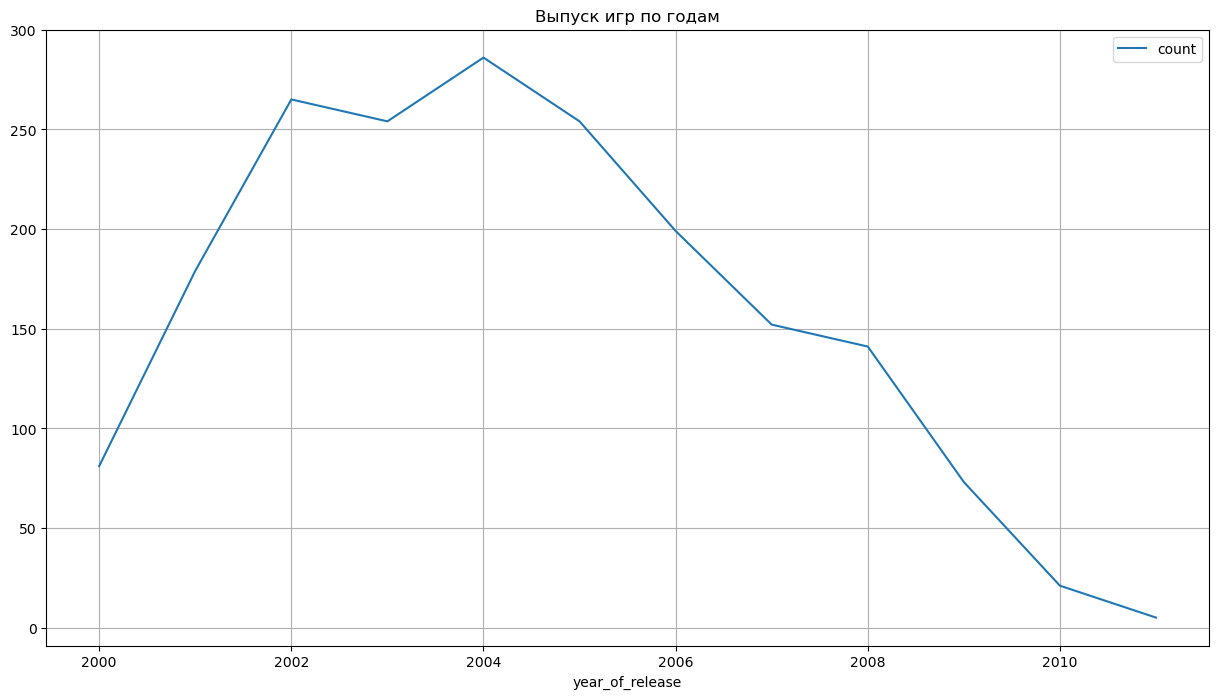

In [199]:
data.loc[(data['platform'] == 'PS2')].groupby('year_of_release')['year_of_release']\
.agg(['count']).sort_values(by = 'year_of_release', ascending=False)\
.plot(figsize = (15, 8), title = 'Выпуск игр по годам', grid = True)

<AxesSubplot:title={'center':'Продажи игр по году выкуска'}, xlabel='year_of_release'>

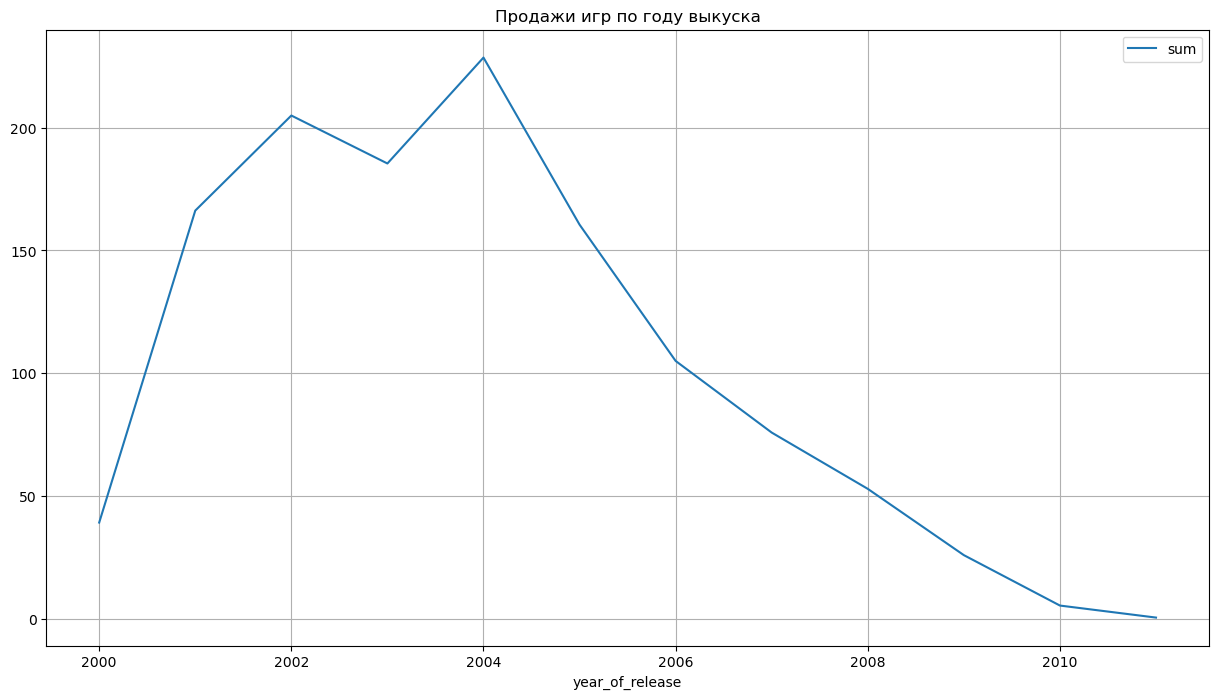

In [200]:
data.loc[(data['platform'] == 'PS2')].groupby('year_of_release')['total_sales']\
.agg(['sum']).sort_values(by = 'year_of_release', ascending=False)\
.plot(figsize = (15, 8), title = 'Продажи игр по году выкуска', grid = True)

Период активной жизни платформы PS2 составил около 10 лет. Для прогноза продаж на 2017 год данные по этой платформе не нужны.

Смотрим X360 - по той же схеме, что PS2.

In [201]:
data.loc[(data['platform'] == 'X360')].groupby('year_of_release')['year_of_release']\
.agg(['count']).sort_values(by = 'year_of_release', ascending=False)

,count
year_of_release,
2016,13
2015,27
2014,61
2013,65
2012,100
2011,177
2010,164
2009,160
2008,142


In [202]:
data.loc[(data['platform'] == 'X360')].groupby('year_of_release')['total_sales']\
.agg(['sum']).sort_values(by = 'year_of_release', ascending=False)

,sum
year_of_release,
2016,1.52
2015,11.79
2014,34.71
2013,88.40
2012,100.52
2011,143.16
2010,169.61
2009,120.03
2008,135.13


Максимум продаж здесь - 2010 год, максимум релизов - 2011 год. Меняем пропуски в годах релизов по этой платформе на 2010.

In [203]:
data.loc[(data['platform'] == 'X360') & (data['year_of_release'].isna()), 'year_of_release'] = 2010

Платформа X360 тоже прожила примерно 10 лет, и к 2016 году она уже утратила актуальность.

Переходим к платформе PS3. Скорее всего, это новая версия PS2... 

In [204]:
data.loc[(data['platform'] == 'PS3')].groupby('year_of_release')['year_of_release']\
.agg(['count']).sort_values(by = 'year_of_release', ascending=False)

,count
year_of_release,
2016,38
2015,43
2014,90
2013,110
2012,122
2011,199
2010,170
2009,153
2008,134


In [205]:
data.loc[(data['platform'] == 'PS3')].groupby('year_of_release')['total_sales']\
.agg(['sum']).sort_values(by = 'year_of_release', ascending=False)

,sum
year_of_release,
2016,3.60
2015,16.11
2014,47.32
2013,112.78
2012,107.60
2011,156.37
2010,141.86
2009,130.73
2008,118.44


Оба показателя (количество релизов и количество продаж) имеют пик в 2011 году. Заменим пропуски в годах релиза на 2011 год.

In [206]:
data.loc[(data['platform'] == 'PS3') & (data['year_of_release'].isna()), 'year_of_release'] = 2011

Но, PS3 - тоже старая платформа, которая свое уже отжила. И снова - 10 лет. Пока ни одна платформа из лидеров по продажам не подходит для прогноза на 2017 год!

Посмотрим на Wii.

In [207]:
data.loc[(data['platform'] == 'Wii')].groupby('year_of_release')['year_of_release']\
.agg(['count']).sort_values(by = 'year_of_release', ascending=False)

,count
year_of_release,
2016,1
2015,2
2014,4
2013,10
2012,26
2011,126
2010,215
2009,294
2008,259


In [208]:
data.loc[(data['platform'] == 'Wii')].groupby('year_of_release')['total_sales']\
.agg(['sum']).sort_values(by = 'year_of_release', ascending=False)

,sum
year_of_release,
2016,0.18
2015,1.10
2014,3.70
2013,8.55
2012,22.86
2011,59.25
2010,127.02
2009,206.17
2008,176.18


Платформа хорошо стартовала в 2006 году, но к 2016 году уже "сдулась". Меняем пропуски на 2009 год - самый активный и успешный год в истории Wii.

In [209]:
data.loc[(data['platform'] == 'Wii') & (data['year_of_release'].isna()), 'year_of_release'] = 2009

Платформа DS.

In [210]:
data.loc[(data['platform'] == 'DS')].groupby('year_of_release')['year_of_release']\
.agg(['count']).sort_values(by = 'year_of_release', ascending=False)

,count
year_of_release,
2013,6
2012,11
2011,114
2010,249
2009,314
2008,385
2007,312
2006,170
2005,108


In [211]:
data.loc[(data['platform'] == 'DS')].groupby('year_of_release')['total_sales']\
.agg(['sum']).sort_values(by = 'year_of_release', ascending=False)

,sum
year_of_release,
2013,1.48
2012,11.43
2011,25.21
2010,83.09
2009,117.31
2008,142.72
2007,145.38
2006,119.07
2005,105.20


DS - еще один динозавр... Меняем пропуски на 2007.

In [212]:
data.loc[(data['platform'] == 'DS') & (data['year_of_release'].isna()), 'year_of_release'] = 2007

Итак, все лидеры продаж сред платформ оказались старыми. Новых игр для них не делают и будущего у них, понятно, нет. Надо искать дальше.

In [213]:
data.loc[(data['platform'] == 'GBA')]['year_of_release'].unique()

<IntegerArray>
[2002, 2004, 2001, 2003, 2005, 2007, 2006, <NA>, 2000]
Length: 9, dtype: Int32

GBA не подходит для прогноза.

In [214]:
data.loc[(data['platform'] == 'PS4')]['year_of_release'].unique()

<IntegerArray>
[2015, 2014, 2016, 2013]
Length: 4, dtype: Int32

PS4 подходит!!!

In [215]:
data.loc[(data['platform'] == 'PSP')]['year_of_release'].unique()

<IntegerArray>
[2005, 2008, 2006, 2010, 2007, 2009, 2004, 2011, <NA>, 2012, 2013, 2014, 2015]
Length: 13, dtype: Int32

PSP не подходит.

In [216]:
data.loc[(data['platform'] == 'XB')]['year_of_release'].unique()

<IntegerArray>
[2004, 2001, 2002, 2003, 2005, 2006, 2000, <NA>, 2007, 2008]
Length: 10, dtype: Int32

XB не подходит.

In [217]:
data.loc[(data['platform'] == '3DS')]['year_of_release'].unique()

<IntegerArray>
[2013, 2011, 2014, 2012, 2016, 2015, <NA>]
Length: 7, dtype: Int32

3DS, подходит, вроде. Посмотрим распределения, и заменим пропуски.

In [218]:
data.loc[(data['platform'] == '3DS')].groupby('year_of_release')['year_of_release']\
.agg(['count']).sort_values(by = 'year_of_release', ascending=False)

,count
year_of_release,
2016,46
2015,58
2014,64
2013,73
2012,80
2011,101


In [219]:
data.loc[(data['platform'] == '3DS')].groupby('year_of_release')['total_sales']\
.agg(['sum']).sort_values(by = 'year_of_release', ascending=False)

,sum
year_of_release,
2016,15.14
2015,27.03
2014,43.44
2013,56.14
2012,51.42
2011,62.82


In [220]:
data.loc[(data['platform'] == '3DS') & (data['year_of_release'].isna()), 'year_of_release'] = 2011

Лучшие годы этой платформы позади - продажи и релизы устойчиво падают. Не похоже, что она проживет 10 лет, как старые платформы.

In [221]:
data.loc[(data['platform'] == 'PC')]['year_of_release'].unique()

<IntegerArray>
[2009, 2004, 2012, 2010, 2007, 2011, 2002, 2014, 2000, 2001, 2003, 2013, 2008,
 2015, 2005, 2016, 2006, <NA>]
Length: 18, dtype: Int32

Это, наверное, не приставка, а персональный компьютер.

In [222]:
data.loc[(data['platform'] == 'PC')].groupby('year_of_release')['year_of_release']\
.agg(['count']).sort_values(by = 'year_of_release', ascending=False)

,count
year_of_release,
2016,54
2015,38
2014,42
2013,36
2012,54
2011,112
2010,73
2009,88
2008,61


In [223]:
data.loc[(data['platform'] == 'PC')].groupby('year_of_release')['total_sales']\
.agg(['sum']).sort_values(by = 'year_of_release', ascending=False)

,sum
year_of_release,
2016,5.25
2015,8.26
2014,13.19
2013,12.68
2012,23.27
2011,34.44
2010,25.51
2009,16.48
2008,12.18


Продажи падают, но новые релизы есть. Важная платформа для прогноза. Посмотрим на пропуски в годах релизов. Это нужно спасать по-максимуму.

In [224]:
data.loc[(data['platform'] == 'PC') & (data['year_of_release'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4648,TERA,PC,<NA>,Role-Playing,0.25,0.12,0.0,0.05,77.0,6.8,M,0.42
6818,BioShock 2,PC,<NA>,Shooter,0.02,0.19,0.0,0.04,88.0,8.0,M,0.25
7724,Dead Space 3,PC,<NA>,Action,0.02,0.16,0.0,0.02,78.0,6.0,M,0.20
7735,Test Drive Unlimited 2,PC,<NA>,Racing,0.05,0.11,0.0,0.03,72.0,5.7,T,0.19
9485,Street Fighter IV,PC,<NA>,Fighting,0.07,0.05,0.0,0.02,91.0,8.0,T,0.14
9706,Rocksmith,PC,<NA>,Misc,0.06,0.04,0.0,0.01,78.0,8.1,T,0.11
11954,Dead Island: Riptide,PC,<NA>,Action,0.00,0.07,0.0,0.01,61.0,6.0,M,0.08
13564,RollerCoaster Tycoon,PC,<NA>,Strategy,0.02,0.02,0.0,0.01,NaN,NaN,E,0.05
13672,Clockwork Empires,PC,<NA>,Strategy,0.00,0.04,0.0,0.00,58.0,3.8,RP,0.04
13781,GRID,PC,<NA>,Racing,0.00,0.03,0.0,0.01,87.0,7.9,E,0.04


In [225]:
data.loc[4648, 'year_of_release'] = 2011 #по отктытым источникам

Дальше меняем по аналогиям. Мы так уже делали раньше.

In [226]:
data.loc[(data['name'].str.contains("BioShock 2"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
744,BioShock 2,X360,2010,Shooter,1.45,0.54,0.02,0.19,88.0,8.2,M,2.20
1211,BioShock 2,PS3,2010,Shooter,0.85,0.46,0.02,0.22,88.0,8.2,M,1.55
6818,BioShock 2,PC,<NA>,Shooter,0.02,0.19,0.00,0.04,88.0,8.0,M,0.25


In [227]:
data.loc[6818, 'year_of_release'] = 2010

In [228]:
data.loc[(data['name'].str.contains("Dead Space 3"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2107,Dead Space 3,X360,2013,Action,0.64,0.26,0.0,0.08,78.0,6.4,M,0.98
2138,Dead Space 3,PS3,2013,Action,0.44,0.36,0.0,0.16,76.0,6.4,M,0.96
7724,Dead Space 3,PC,<NA>,Action,0.02,0.16,0.0,0.02,78.0,6.0,M,0.20


In [229]:
data.loc[7724, 'year_of_release'] = 2013

In [230]:
data.loc[(data['name'].str.contains("Test Drive Unlimited 2"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2969,Test Drive Unlimited 2,X360,2010,Racing,0.30,0.31,0.00,0.07,68.0,6.4,T,0.68
3233,Test Drive Unlimited 2,PS3,2011,Racing,0.16,0.34,0.01,0.12,70.0,6.1,T,0.63
7735,Test Drive Unlimited 2,PC,<NA>,Racing,0.05,0.11,0.00,0.03,72.0,5.7,T,0.19


In [231]:
data.loc[7735, 'year_of_release'] = 2011

In [232]:
data.loc[(data['name'].str.contains("Street Fighter IV"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
280,Street Fighter IV,PS3,2009,Fighting,2.03,1.04,0.58,0.52,94.0,7.3,T,4.17
490,Street Fighter IV,X360,2009,Fighting,1.82,0.70,0.15,0.26,93.0,7.3,T,2.93
1656,Super Street Fighter IV: 3D Edition,3DS,2011,Fighting,0.55,0.44,0.14,0.09,85.0,8.1,T,1.22
9485,Street Fighter IV,PC,<NA>,Fighting,0.07,0.05,0.00,0.02,91.0,8.0,T,0.14
10724,Ultra Street Fighter IV,PS4,2015,Fighting,0.00,0.08,0.00,0.01,71.0,5.9,T,0.09


In [233]:
data.loc[9485, 'year_of_release'] = 2009

In [234]:
data.loc[(data['name'].str.contains("Rocksmith"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1824,Rocksmith,PS3,2011,Misc,0.53,0.36,0.09,0.15,80.0,8.3,T,1.13
1827,Rocksmith,X360,2011,Misc,0.84,0.19,0.01,0.08,77.0,8.2,T,1.12
2109,Rocksmith 2014,PS3,2013,Misc,0.53,0.24,0.05,0.16,71.0,NaN,E,0.98
2191,Rocksmith 2014,X360,2013,Misc,0.69,0.16,0.00,0.09,71.0,NaN,E,0.94
3087,Rocksmith 2014,PC,2013,Misc,0.36,0.24,0.00,0.06,71.0,NaN,E,0.66
3200,Rocksmith 2014,PS4,2014,Misc,0.35,0.17,0.00,0.11,71.0,NaN,E,0.63
4747,Rocksmith 2014,XOne,2014,Misc,0.29,0.08,0.00,0.04,71.0,NaN,E,0.41
9706,Rocksmith,PC,<NA>,Misc,0.06,0.04,0.00,0.01,78.0,8.1,T,0.11
15864,Rocksmith 2014 Edition Remastered,PS4,2016,Misc,0.01,0.00,0.00,0.00,NaN,7.8,T,0.01
16182,Rocksmith 2014 Edition Remastered,XOne,2016,Misc,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01


In [235]:
data.loc[9706, 'year_of_release'] = 2011

In [236]:
data.loc[(data['name'].str.contains("Dead Island: Riptide"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2625,Dead Island: Riptide,X360,2013,Action,0.44,0.26,0.01,0.07,57.0,6.3,M,0.78
3333,Dead Island: Riptide,PS3,2013,Action,0.26,0.19,0.07,0.09,62.0,5.9,M,0.61
11954,Dead Island: Riptide,PC,<NA>,Action,0.00,0.07,0.00,0.01,61.0,6.0,M,0.08


In [237]:
data.loc[11954, 'year_of_release'] = 2013

In [238]:
data.loc[(data['name'].str.contains("RollerCoaster Tycoon"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1597,RollerCoaster Tycoon 2,PC,2002,Strategy,1.19,0.05,0.0,0.00,74.0,8.5,E,1.24
6314,RollerCoaster Tycoon 3,PC,2004,Strategy,0.01,0.22,0.0,0.04,81.0,5.0,E,0.27
9489,RollerCoaster Tycoon,XB,2003,Strategy,0.10,0.03,0.0,0.00,62.0,8.3,E,0.13
11254,RollerCoaster Tycoon 3: Platinum,PC,2005,Strategy,0.01,0.06,0.0,0.01,66.0,NaN,NaN,0.08
13564,RollerCoaster Tycoon,PC,<NA>,Strategy,0.02,0.02,0.0,0.01,NaN,NaN,E,0.05
15483,RollerCoaster Tycoon World,PC,2016,Simulation,0.00,0.02,0.0,0.00,43.0,2.4,E,0.02


Не понятно, что присваивать, и старая игра, вероятно. Выбрасываем.

In [239]:
data = data.drop([13564])

In [240]:
data.loc[(data['name'].str.contains("Clockwork Empires"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13672,Clockwork Empires,PC,<NA>,Strategy,0.0,0.04,0.0,0.0,58.0,3.8,RP,0.04


Аналогов нет, но есть рейтинг "RP". Это значит, "рейтинг ожидается". То есть игра - новая, 2016 года.

In [241]:
data.loc[13672, 'year_of_release'] = 2016

In [242]:
data.loc[(data['name'].str.contains("GRID"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1868,GRID,PS3,2008,Racing,0.31,0.56,0.03,0.20,87.0,8.1,E,1.10
2396,GRID,X360,2008,Racing,0.33,0.44,0.01,0.09,87.0,7.9,E,0.87
5064,GRID 2,PS3,2013,Racing,0.07,0.22,0.01,0.08,82.0,6.6,E,0.38
6267,GRID 2,X360,2013,Racing,0.08,0.16,0.00,0.03,78.0,5.8,E,0.27
8093,GRID Autosport,PS3,2014,Racing,0.05,0.09,0.01,0.03,75.0,6.8,E,0.18
11146,GRID Autosport,X360,2014,Racing,0.03,0.05,0.00,0.01,75.0,6.0,E,0.09
12306,GRID 2,PC,2013,Racing,0.00,0.06,0.00,0.01,80.0,5.7,E,0.07
13142,GRID,DS,2007,Racing,0.04,0.00,0.00,0.00,79.0,8.1,E,0.04
13781,GRID,PC,<NA>,Racing,0.00,0.03,0.00,0.01,87.0,7.9,E,0.04
14999,GRID Autosport,PC,2014,Racing,0.00,0.02,0.00,0.00,78.0,6.2,E,0.02


In [243]:
data.loc[13781, 'year_of_release'] = 2008

In [244]:
data.loc[(data['name'].str.contains("Battle vs. Chess"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13609,Battle vs. Chess,PS3,2011,Misc,0.0,0.03,0.0,0.01,NaN,NaN,T,0.04
14746,Battle vs. Chess,PC,<NA>,Misc,0.0,0.02,0.0,0.00,69.0,5.9,T,0.02


In [245]:
data.loc[14746, 'year_of_release'] = 2011

In [246]:
data.loc[(data['name'].str.contains("WRC: FIA World Rally Championship"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
7584,WRC: FIA World Rally Championship,PS3,2011,Racing,0.00,0.14,0.01,0.04,68.0,4.5,E,0.19
9827,WRC: FIA World Rally Championship,X360,2010,Racing,0.00,0.10,0.00,0.02,66.0,6.0,E10+,0.12
14233,WRC: FIA World Rally Championship,PSP,2005,Racing,0.02,0.01,0.00,0.00,67.0,7.8,E,0.03
16180,WRC: FIA World Rally Championship,PC,<NA>,Racing,0.00,0.01,0.00,0.00,65.0,NaN,RP,0.01


Не понятно, что присваивать - выбрасываем.

In [247]:
data = data.drop([16180])

In [248]:
data.loc[(data['name'].str.contains("Homeworld Remastered Collection"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16277,Homeworld Remastered Collection,PC,<NA>,Strategy,0.0,0.01,0.0,0.0,86.0,8.2,E10+,0.01


In [249]:
data = data.drop([16277])

In [250]:
data.loc[(data['name'].str.contains("Inversion"))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12146,Inversion,PS3,2012,Shooter,0.03,0.03,0.0,0.01,56.0,5.4,M,0.07
12678,Inversion,X360,2012,Shooter,0.03,0.02,0.0,0.01,53.0,6.5,M,0.06
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.0,0.00,59.0,6.7,M,0.01


In [251]:
data.loc[16448, 'year_of_release'] = 2012

In [252]:
data.loc[(data['platform'] == 'PC') & (data['year_of_release'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


По платформе PC - все. Осталось еще 4 платформы.

In [253]:
data.loc[(data['platform'] == 'GC')]['year_of_release'].unique()

<IntegerArray>
[2001, 2003, 2002, 2004, 2005, 2006, <NA>, 2007]
Length: 8, dtype: Int32

Старая платформа. Не подходит для прогноза.

In [254]:
data.loc[(data['platform'] == 'XOne')]['year_of_release'].unique()

<IntegerArray>
[2015, 2014, 2013, 2016]
Length: 4, dtype: Int32

Новая платформа. Посмотрим наши стандартные распределения.

In [255]:
data.loc[(data['platform'] == 'XOne')].groupby('year_of_release')['year_of_release']\
.agg(['count']).sort_values(by = 'year_of_release', ascending=False)

,count
year_of_release,
2016,87
2015,74
2014,58
2013,19


In [256]:
data.loc[(data['platform'] == 'XOne')].groupby('year_of_release')['total_sales']\
.agg(['sum']).sort_values(by = 'year_of_release', ascending=False)

,sum
year_of_release,
2016,26.15
2015,60.01
2014,54.01
2013,18.96


Количество релизов растет. В 2016 году не очень активно покупают, но это - актуальная платформа. Пропусков в годе релиза по этой платформе нет.

In [257]:
data.loc[(data['platform'] == 'PS')]['year_of_release'].unique()

<IntegerArray>
[2000, 2001, 2002, 2003, <NA>]
Length: 5, dtype: Int32

Еще одна старая платформа. Можно выбросить.

In [258]:
data.loc[(data['platform'] == 'WiiU')]['year_of_release'].unique()

<IntegerArray>
[2014, 2012, 2015, 2013, 2016]
Length: 5, dtype: Int32

Эта платформа подходит для прогноза, пропусков нет. На этом обработку пропусков мы заканчиваем. Посмотрим, что получилось.

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12613 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12613 non-null  object 
 1   platform         12613 non-null  object 
 2   year_of_release  12550 non-null  Int32  
 3   genre            12613 non-null  object 
 4   na_sales         12613 non-null  float64
 5   eu_sales         12613 non-null  float64
 6   jp_sales         12613 non-null  float64
 7   other_sales      12613 non-null  float64
 8   critic_score     12251 non-null  float64
 9   user_score       7399 non-null   float64
 10  rating           11620 non-null  object 
 11  total_sales      12613 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.5+ MB


### Выводы по предобработке данных

1. Значительная часть исходного датафрейма была практически безупречна. Это касается данных по:
- названию и жанру игры;
- платформе, для которой игра предназначена;
- объемам продаж игры (в млн копий) в разных частях мира.

2. Перечисленные в п.1 данные не изменялись вообще. Мы добавили в датафрейм новый столбец - суммарный объем продаж игр.


3. Анализ данных с пропусками показал, что у старых игр, релиз которых датирован 80-90 гг. прошлого века, как правило отвутствуют оценки этих игр критиками и пользователями, а также возрастной рейтинг. Мы решили, что эти старые игры не могут быть полезны для основной задачи исследования и исключили из датафрема игры, по которым было известно, что они вышли до 2000 года. Таких игр оказалось почти 2000 штук. Но это, для прогноза продаж на 2017 год, - реально незначимые данные.


4. Также мы исключили из датафрейма не новые (выпущенные до 2016 года) игры без оценок и ворастного рейтинга с суммарным объемом продаж менее 50 тыс. копий. Это - непопулярные игры, которые даже оценивать никому не интересно. Таких игр оказалось тоже почти 2000.


5. Сокращения датафрейма, указанные в пп. 3 и 4 - максимальные сокращения, которые были сделаны нами на этапе предобработки данных.


6. Далее мы выяснили и провели замену значения "tbd" в столбце "Оценка пользователей".


7. Радикальные меры, описанные в пп. 3 и 4, не решили проблему с пропусками в столбцах про оценки (критиков и пользователей) и возрастной рейтинг игр. По оценкам игр была проведена замена пропусков:

- для самых популярных (продаваемых) игр - вручную на основе открытых данных;

- по аналогиям (то есть пропуски заменены на имеющиеся в датафреме оценки для тех же игр для других платформ).
Далее пропуски в оценках критиков были заменены на медианные значения по выборкам по суммарным продажам с выделением отдельных интервалов (параметров выборок). Для замены пропусков в оценках пользователей данный метод признан не подходящим (низкая корреляция между оценками пользователей и общими продажами).

8. При работе с пропусками по возрастному рейтингу было выяснено, что отсутствие рейтинга - нормальное явление для:

- новых (выпуска 2016 г.) игр;

- игр, которые не ориентированы на продажи в Северной Америке.

9. Основная часть пропусков по возрастному рейтингу была заполнена превалирующим (более половины) рейтингом для игр конкретного жанра (по жанрам, напомним, пропусков в датафреме нет). Еще часть пропусков была заполнена по аналогиям (на имеющиеся рейтинги данной игры, выпущенной для других платформ).


10. Пропуски в годе выпуска игр заполнялись всеми возможными способами:

- по аналогии (с той же игрой для других платформ, если там был год релиза);

- по имени (игра "Название 20NN", очевидно, вышла в 20NN году);

- по открытым источникам (в уникальных случаях, где другие методы не сработали).

11. Меры, указанные в п. 10, не обеспечили желаемого авторами настоящего исследования результата в части заполнения пропусков в годах релизов игр. Для решения этой задачи были исследованы данные по платформам, для которых выпускались новые игры.


12. **Это - важнейший вывод данного этапа**. Большая часть платформ из нашего датафрема к 2016 году утратила свою актуальность. Для них не выпускают новых игр, а значит - у них нет будущего. На начальных этапах предобработки мы уже выбросили данные по одной старой платформе, на настоящем этапе - выбросили еще несколько платформ. И в дальнейшем, в исследовательской части, тоже еще несколько выбросим.


13. На этапе предобработки было удалено 4102 строки или почти 25% отначальной базы. Но основную часть выброшенных строк (порядка 4000) составляют старые данные (до 2000 года) и строки с большим количество пропусов и минимальным объемом продаж.


### Проверка на дубликаты

In [260]:
data.duplicated().sum()

0

Дубликатов нет.

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы?

В разделе [1.4](###выпуск-новых-игр-по-годам) мы выводили распределение релизов игр по годам за весь период наблюдений на основе исходной (не очищенной) базы данных. Там было видно начало качественного развития рынка игр, которое относится к 1993-1994 гг. Также было проанализировано влияние на рынок глобальных кризисов.

Выведем распределение по очищенному датафрейму.

<AxesSubplot:title={'center':'Выпуск игр по годам'}, xlabel='year_of_release'>

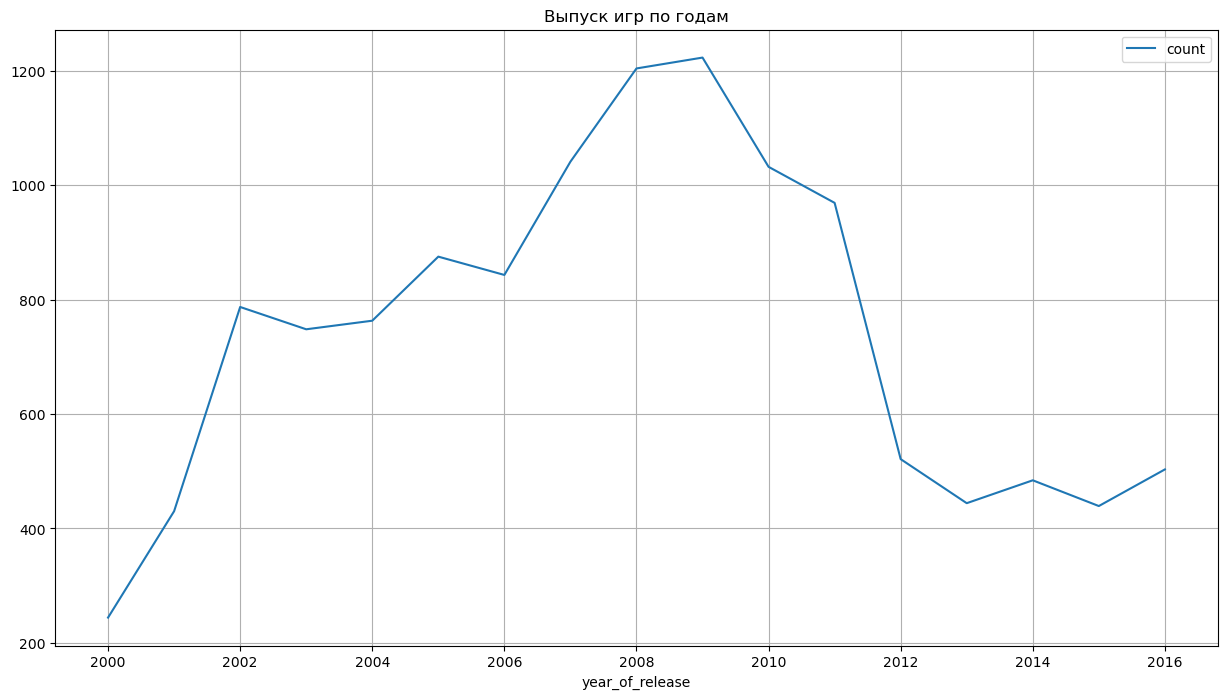

In [261]:
data.groupby('year_of_release')['year_of_release'].agg(['count']).\
plot(figsize = (15, 8), title = 'Выпуск игр по годам', grid = True)

Складывается впечатление, что народ в целом наигрался в компьютерные игры. Или у разработчиков иссякли идеи... Так или иначе, но времена, когда ежегодно предлагалось более 1000 новых релизов остались в прошлом. С 2012 года количество новых игр на рынке стабилизировалось. Но это, примерно, - уровень 2001 года. То есть уровень 15-летней давности. 

### Как менялись продажи по платформам?

В разделах 1.16 и 1.18 построены распределения продаж по каждой платформе. Здесь резюмируем основные выводы.

1. С точки зрения продавца игр, жизненный цикл подавляющего большинства платформ конечен и составляет порядка 10-11 лет. Этот жизненный цикл делится на три примерно равные части: рост, максимальный уровень и падение числа новых релизов и, соотвественно, продаж. В конечном итоге выход новых игр для конкретной платформы полностью прекращается.

2. Возможно, "конечность" жизненного цикла платформ - сознательная политика их производителей. В самом деле, платформы PS-PS4, очевидно, принадлежат одному семейству. И новая платформа в этом семействе появлялась ровно тогда, старая проходила период максимального количества релизов. Возможно, количество релизов для "старой" PS сокращалась специально, чтобы пользователь купил "новую" PS. Аналогичная картина наблюдается по семейству DS-3DS и семейству Х-платформ.

3. Единственным исключением из п.1 является платформа PC, которую мы идентифицировали как "персональный компьютер". Остальные - это специальные игровые приставки.

4. Пятерка платформ-лидеров по суммарным продажам (начиная с 2000 года) выглядит следующим образом: PS2, X360, PS3, Wii и DS. При этом для PS2 новых игр не выпускается с 2012 года, для DS - с 2014 года. Остальные участники первой пятерки, по состоянию на 2016 год, находятся на завершаающей стадии своего жизненного цикла.

5. Новые приставки в последний раз появлялись на рынке в 2013 году. И количество новых релизов для них заметно меньше, чем было на пике для "умерших" (с точки зрения продавца) PS2 и DS. Это еще раз подтверждает предположение, что народ наигрался. По крайней мере - в приставки. Что на самом деле логично, учитывая рост индустрии игр через интернет.

6. Как следствие из п.5, есть основания полагать, что жизненный цикл новых приставок будет короче, чем у старых, и составит 7-9 лет.

### Определение "актуального периода" данных для прогноза продаж на 2017 год

С учетом вывода из 2.1 об относительной стабилизации рынка новых игр в 2012 году и выводов 2.2 о жизненном цикле платформ, представляется логичным для прогноза на 2017 года использовать данные, начиная с 2012 года. Оценим такую возможность.

Выведем сводную таблицу по годам и новым релизам для каждой платформы.

In [262]:
data.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,80.0,73.0,64.0,58.0,46.0
DS,NaN,NaN,NaN,NaN,20.0,108.0,170.0,341.0,385.0,314.0,249.0,114.0,11.0,6.0,NaN,NaN,NaN
GBA,1.0,101.0,185.0,142.0,166.0,107.0,23.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,22.0,148.0,135.0,79.0,93.0,38.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,6.0,11.0,17.0,31.0,25.0,31.0,40.0,54.0,62.0,89.0,74.0,116.0,55.0,38.0,42.0,38.0,55.0
PS,155.0,84.0,16.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,81.0,179.0,265.0,254.0,286.0,254.0,199.0,152.0,141.0,73.0,21.0,5.0,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,23.0,87.0,134.0,153.0,170.0,222.0,122.0,110.0,90.0,43.0,38.0
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,74.0,128.0,164.0


Мы видим большое количество платформ, для которых в 2016 году не было новых релизов. И не видим ни одного случая, чтобы новые релизы выходили в следующем году, при условии, что в этом году релизов не было. Следовательно, **для проноза на 2017 год мы должны смотреть только на те платформы, релизы для которых в 2016 году были**.

In [269]:
data.loc[(data['platform'].isin(['GC', 'DS', 'GBA']))].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2989 entries, 6 to 16698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2989 non-null   object 
 1   platform         2989 non-null   object 
 2   year_of_release  2965 non-null   Int32  
 3   genre            2989 non-null   object 
 4   na_sales         2989 non-null   float64
 5   eu_sales         2989 non-null   float64
 6   jp_sales         2989 non-null   float64
 7   other_sales      2989 non-null   float64
 8   critic_score     2962 non-null   float64
 9   user_score       1137 non-null   float64
 10  rating           2779 non-null   object 
 11  total_sales      2989 non-null   float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 294.8+ KB


In [270]:
data = del_row_cond(data, data['platform'].isin(['GC', 'DS', 'GBA']))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9624 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             9624 non-null   object 
 1   platform         9624 non-null   object 
 2   year_of_release  9585 non-null   Int32  
 3   genre            9624 non-null   object 
 4   na_sales         9624 non-null   float64
 5   eu_sales         9624 non-null   float64
 6   jp_sales         9624 non-null   float64
 7   other_sales      9624 non-null   float64
 8   critic_score     9289 non-null   float64
 9   user_score       6262 non-null   float64
 10  rating           8841 non-null   object 
 11  total_sales      9624 non-null   float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 949.2+ KB


Контрольные цифры сошлись. Продолжаем.

In [271]:
data.loc[(data['platform'].isin(['PS', 'PS2', 'PSP', 'XB']))].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3836 entries, 17 to 16591
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3836 non-null   object 
 1   platform         3836 non-null   object 
 2   year_of_release  3797 non-null   Int32  
 3   genre            3836 non-null   object 
 4   na_sales         3836 non-null   float64
 5   eu_sales         3836 non-null   float64
 6   jp_sales         3836 non-null   float64
 7   other_sales      3836 non-null   float64
 8   critic_score     3811 non-null   float64
 9   user_score       2333 non-null   float64
 10  rating           3573 non-null   object 
 11  total_sales      3836 non-null   float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 378.4+ KB


In [272]:
data = del_row_cond(data, data['platform'].isin(['PS', 'PS2', 'PSP', 'XB']))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5788 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5788 non-null   object 
 1   platform         5788 non-null   object 
 2   year_of_release  5788 non-null   Int32  
 3   genre            5788 non-null   object 
 4   na_sales         5788 non-null   float64
 5   eu_sales         5788 non-null   float64
 6   jp_sales         5788 non-null   float64
 7   other_sales      5788 non-null   float64
 8   critic_score     5478 non-null   float64
 9   user_score       3929 non-null   float64
 10  rating           5268 non-null   object 
 11  total_sales      5788 non-null   float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 570.9+ KB


Мы выбросили платформы, для которых не было новых релизов в 2016 году. Датафрейм похудел вдвое, что, конечно, плохо.

Перевыведем сводную таблицу.

In [273]:
data.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,80.0,73.0,64.0,58.0,46.0
PC,6.0,11.0,17.0,31.0,25.0,31.0,40.0,54.0,62.0,89.0,74.0,116.0,55.0,38.0,42.0,38.0,55.0
PS3,NaN,NaN,NaN,NaN,NaN,NaN,23.0,87.0,134.0,153.0,170.0,222.0,122.0,110.0,90.0,43.0,38.0
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,74.0,128.0,164.0
PSV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,46.0,51.0,64.0,43.0,85.0
Wii,NaN,NaN,NaN,NaN,NaN,NaN,41.0,158.0,259.0,323.0,215.0,126.0,26.0,10.0,4.0,2.0,1.0
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,38.0,25.0,25.0,14.0
X360,NaN,NaN,NaN,NaN,NaN,17.0,85.0,122.0,142.0,160.0,192.0,177.0,100.0,65.0,61.0,27.0,13.0
XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,58.0,74.0,87.0


И распределение по годам.

<AxesSubplot:title={'center':'Выпуск игр по годам'}, xlabel='year_of_release'>

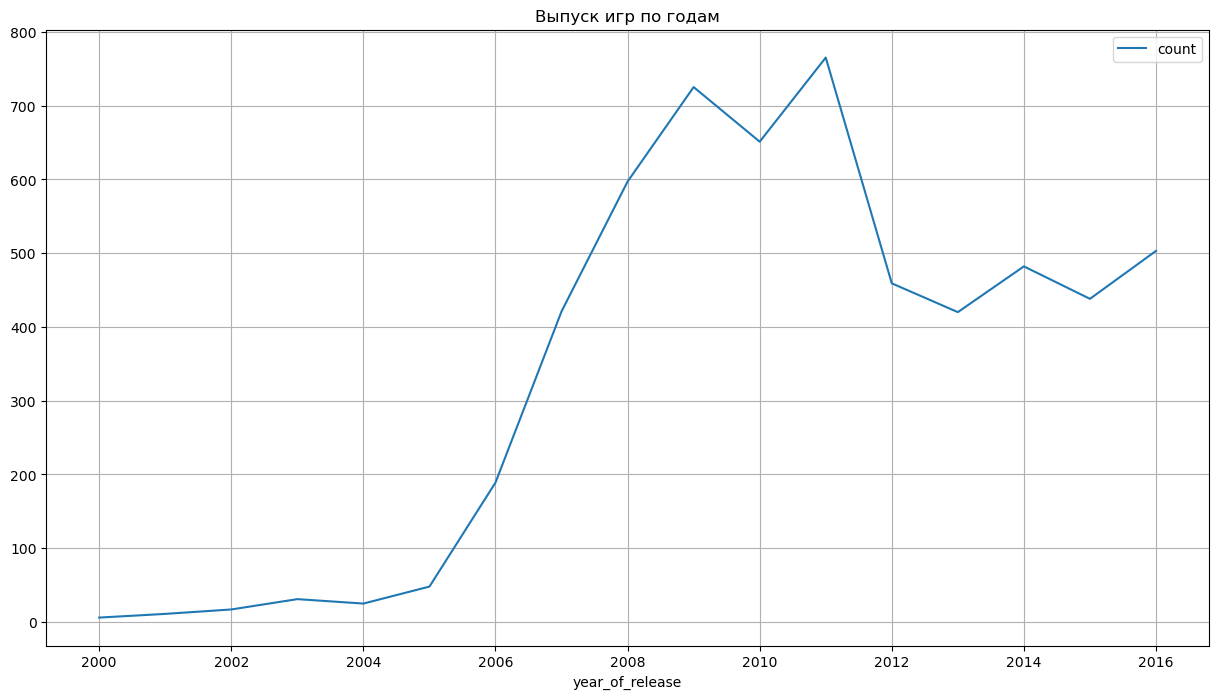

In [274]:
data.groupby('year_of_release')['year_of_release'].agg(['count']).\
plot(figsize = (15, 8), title = 'Выпуск игр по годам', grid = True)

Распределение поменялось. Даже наметилась тенденция к росту релизов с 2013 года...

**Таким образом, есть все основания для прогноза на 2017 год оставить в датафрейме только данные с 2012 года**.

In [275]:
data = del_row_cond(data, data['year_of_release'] < 2012)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2302 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2302 non-null   object 
 1   platform         2302 non-null   object 
 2   year_of_release  2302 non-null   Int32  
 3   genre            2302 non-null   object 
 4   na_sales         2302 non-null   float64
 5   eu_sales         2302 non-null   float64
 6   jp_sales         2302 non-null   float64
 7   other_sales      2302 non-null   float64
 8   critic_score     2032 non-null   float64
 9   user_score       1494 non-null   float64
 10  rating           1936 non-null   object 
 11  total_sales      2302 non-null   float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 227.1+ KB


### Анализ актуальных платформ

Перед исследованием поставлена задача определить, какие платформы лидируют по продажам, растут или падают? А также выбрать несколько потенциально прибыльных платформ (очевидно - на 2017 год).

Еще раз перевыведем сводную таблицу по релизам.

In [276]:
data.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,80.0,73.0,64.0,58.0,46.0
PC,55.0,38.0,42.0,38.0,55.0
PS3,122.0,110.0,90.0,43.0,38.0
PS4,NaN,16.0,74.0,128.0,164.0
PSV,46.0,51.0,64.0,43.0,85.0
Wii,26.0,10.0,4.0,2.0,1.0
WiiU,30.0,38.0,25.0,25.0,14.0
X360,100.0,65.0,61.0,27.0,13.0
XOne,NaN,19.0,58.0,74.0,87.0


Лидеры - PS4, XOne и PSV. Все они - растут. Остальные - падают. РС мы оставляем за скобками.

И сделаем такую же таблицу по продажам.

In [277]:
data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.42,56.14,43.44,27.03,15.14
PC,23.28,12.96,13.19,8.26,5.29
PS3,107.60,112.78,47.32,16.11,3.60
PS4,NaN,25.99,99.99,118.70,69.25
PSV,16.21,10.36,11.12,4.71,4.25
Wii,22.86,8.55,3.70,1.10,0.18
WiiU,17.51,21.56,21.89,16.30,4.60
X360,100.52,88.40,34.71,11.79,1.52
XOne,NaN,18.96,54.01,60.01,26.15


По всем приставкам видим просто обвал продаж в 2016 году. Объяснить этот феномен можно только одним.

**Данные по продажам за 2016 год - неполные.**

Однако лидеры, с большим отрывом, - PS4 и XOne. Они же лидировали в 2015 году, по которому данные, априори, полные. Продажи игр для этих приставок растут (не считая 2016 года).

На 3-м месте по продажам - приставка 3DS, но продажи игр для нее падают с 2014 года...

Неожиданно слабый показатель в 2016 у приставки PSV. Но, опять-таки, - неполные данные. И, похоже по каким-то приставкам данные, к примеру, за 1й квартал, по другим за полгода...

Так или иначе, но в 2015 году рост продаж игр наблюдался только у PS4 и XOne.

Они же являются - самыми молодыми приставками. 2017 год будет их пятым годом на рынке, по статистике, это период максимальных продаж. В этой связи **самыми перспективными на 2017 год являются PS4 и XOne**.

Выведем графиком

<AxesSubplot:xlabel='year_of_release'>

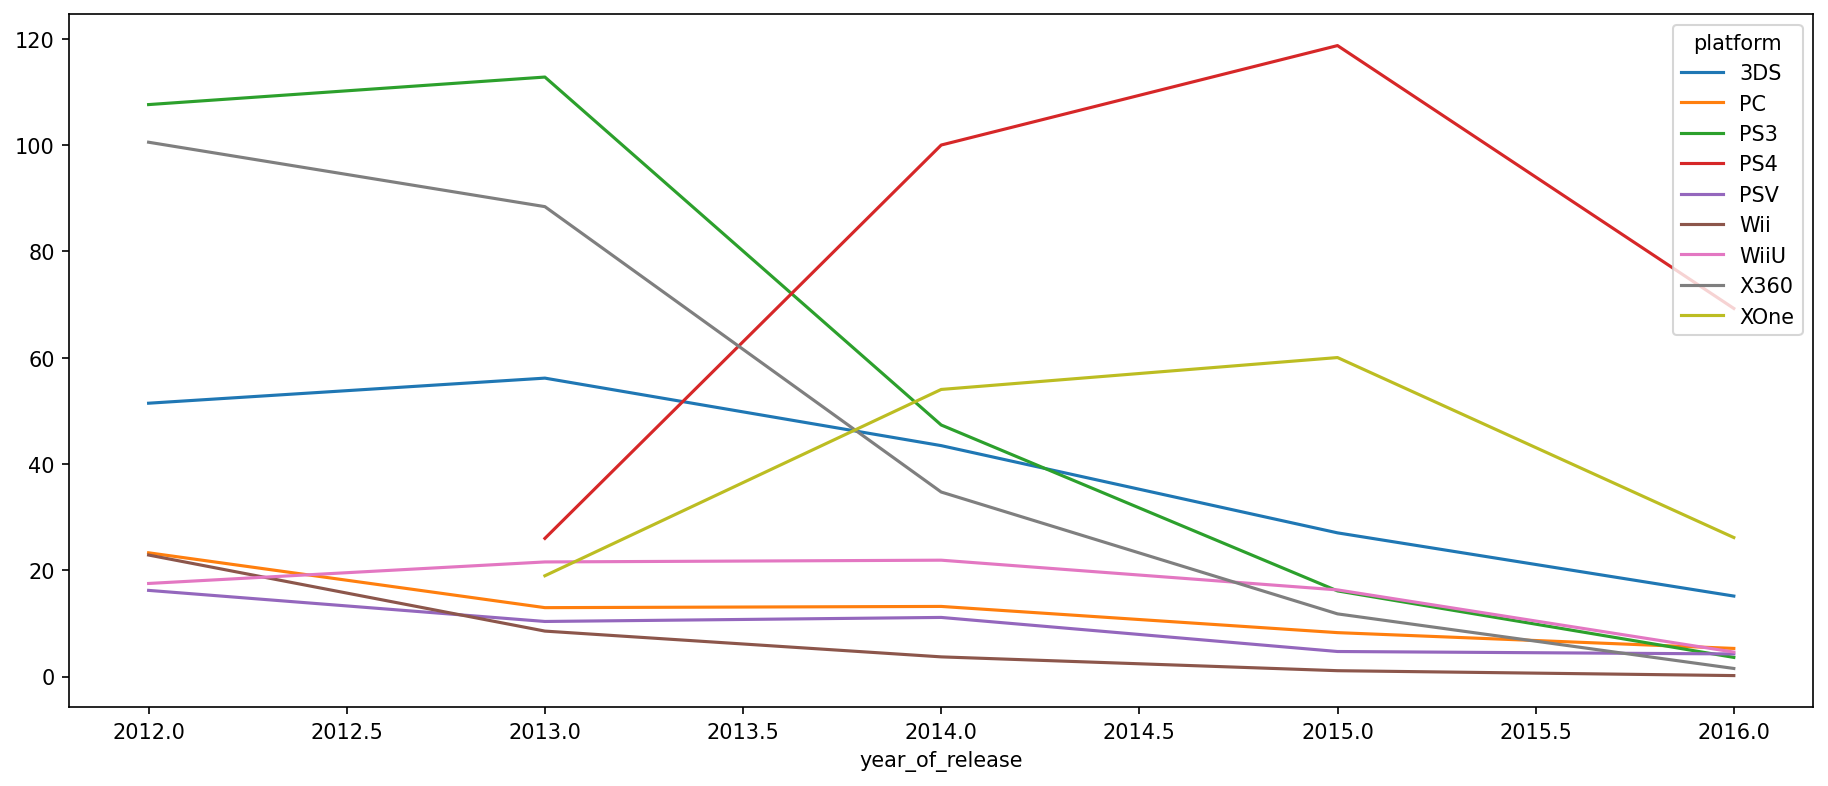

In [281]:
fig, ax= plt.subplots(figsize=(15,6), dpi=150)
data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(ax=ax)

### Распрделение продаж по платформам

Строим графики типа «ящик с усами» по глобальным продажам игр в разбивке по платформам.

<AxesSubplot:>

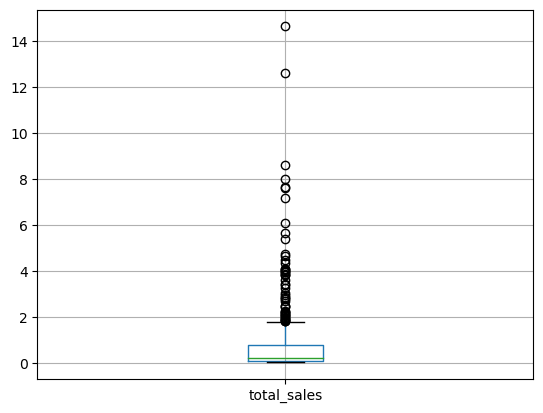

In [282]:
data.query('platform == "PS4"').boxplot('total_sales')

Выше уже отмечалось, что продажи игры объемом 5 млн копий и более статистически являются выбросами. На распределии продаж для PS4 это прекрасно видно.

Увеличим масштаб...

(0.0, 3.0)

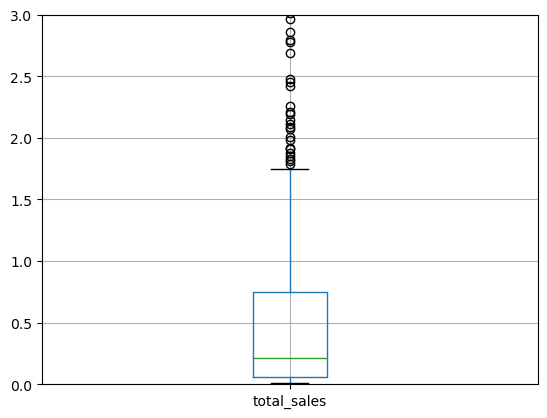

In [283]:
data.query('platform == "PS4"').boxplot('total_sales')
plt.ylim(0, 3)

Выведем цифры...

In [284]:
data.query('platform == "PS4"')['total_sales'].describe()

count    382.000000
mean       0.821806
std        1.625402
min        0.010000
25%        0.060000
50%        0.210000
75%        0.745000
max       14.630000
Name: total_sales, dtype: float64

Более 75% игр для PS4 продано в количестве менее 0,75 млн копий.

<AxesSubplot:>

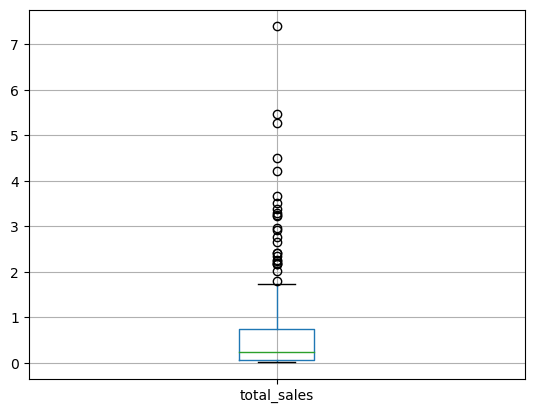

In [285]:
data.query('platform == "XOne"').boxplot('total_sales')

Продажи на XOne распределены аналогичным образом. Посмотрим цифры.

In [286]:
data.query('platform == "XOne"')['total_sales'].describe()

count    238.000000
mean       0.668613
std        1.048335
min        0.010000
25%        0.070000
50%        0.240000
75%        0.737500
max        7.390000
Name: total_sales, dtype: float64

Практически как у PS4. Только главный хит XOne почти вдвое хуже продается, чем главный хит PS4.

Посмотрим какую-нибудь маленькую платформу.

<AxesSubplot:>

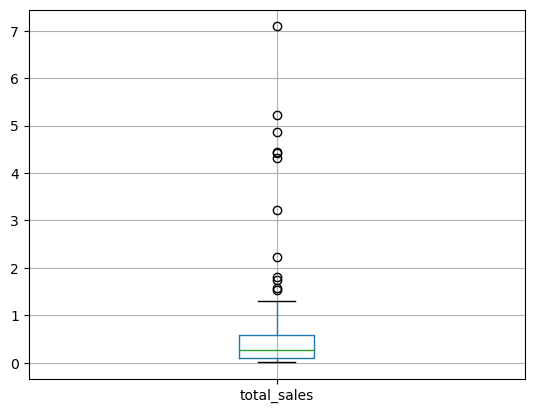

In [287]:
data.query('platform == "WiiU"').boxplot('total_sales')

In [288]:
data.query('platform == "WiiU"')['total_sales'].describe()

count    132.000000
mean       0.620152
std        1.101233
min        0.010000
25%        0.107500
50%        0.270000
75%        0.592500
max        7.090000
Name: total_sales, dtype: float64

Аналогичная картина. В принипе в 1.11 мы рисовали гистограмму продаж и точечную диаграмму, и там был четкий положительный перекос. Это же, очевидно, характерно и для каждой конкретной платформы.

Выведем все на одной картинке.

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

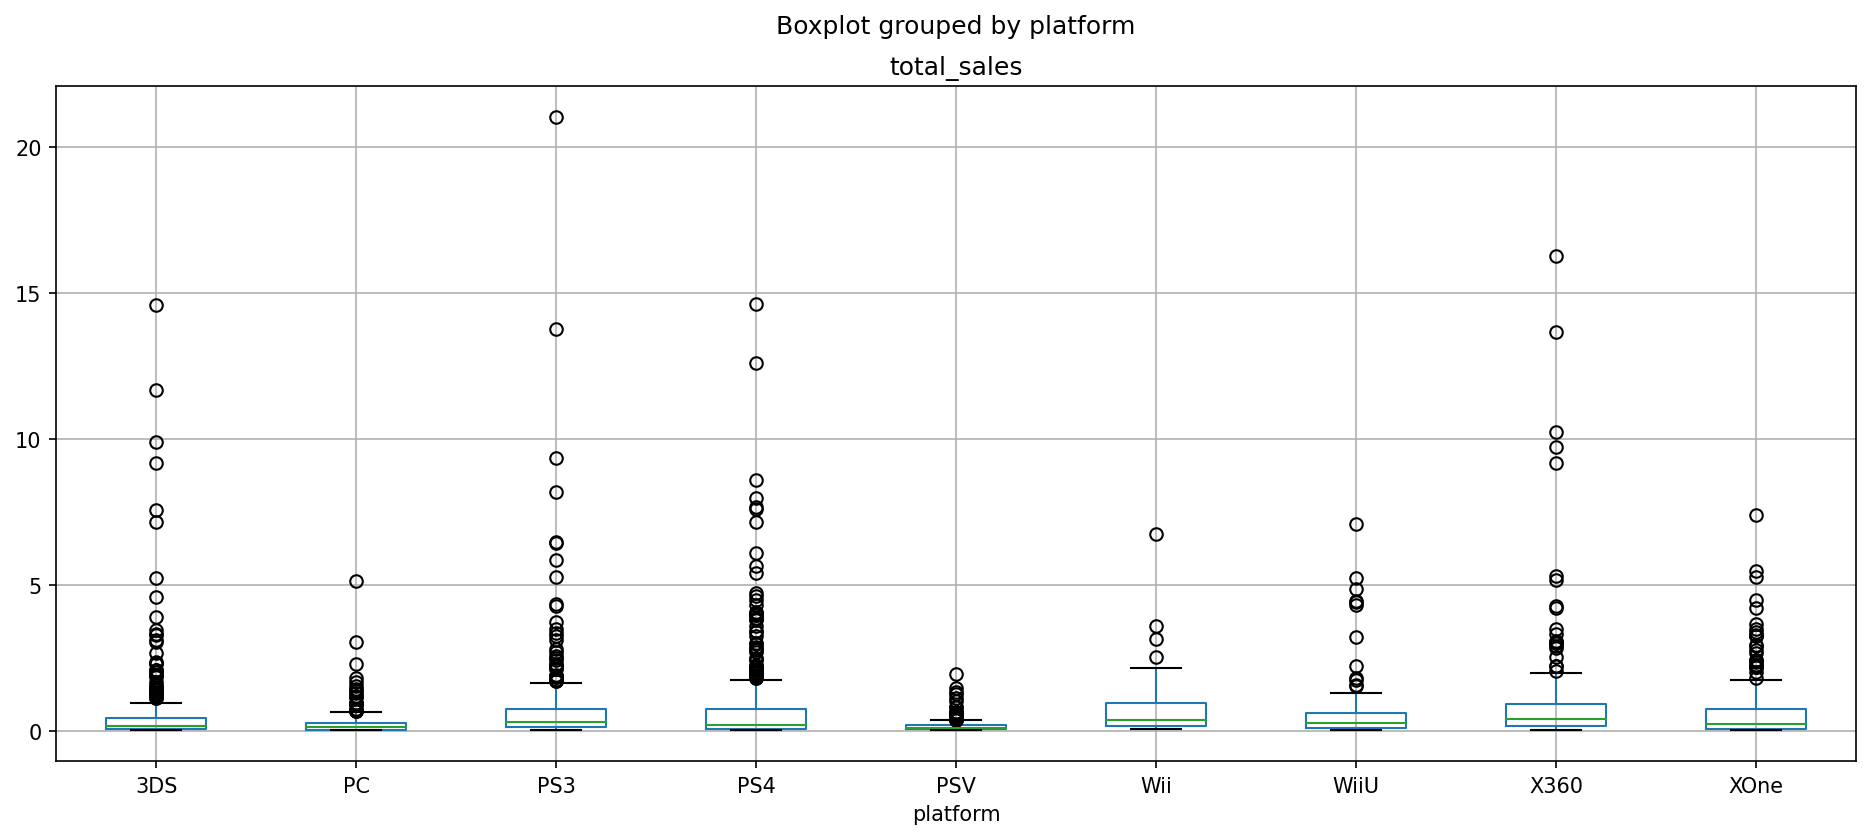

In [289]:
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
data.boxplot(by='platform', column='total_sales', ax=ax)

### Влияние отзывов критиков и пользователей на объем продаж игр для PS4

Очередная задача, которая была поставлена перед настоящим исследованием - оценить, "как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков", построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.

#### Отзывы критиков

В этой части чистого эксперимента уже не получится, поскольку мы меняли пропуски в отзывах критиков на медианные значения по специально подобранным срезам по общим продажам.

Но, у нас есть старые данные по корреляции данных показателей для PS4 по неочищенной базе данных (п.1.6). Это:

0.40656790206178095

Выведем ноовый показатель.

In [290]:
data.query('platform == "PS4"')['critic_score'].corr(data.query('platform == "PS4"')['total_sales'])

0.42795870743318026

Как и следовало ожидать, свежий показатель корреляции оказался выше, чем старый.

Строим диаграмму рассеяния.

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

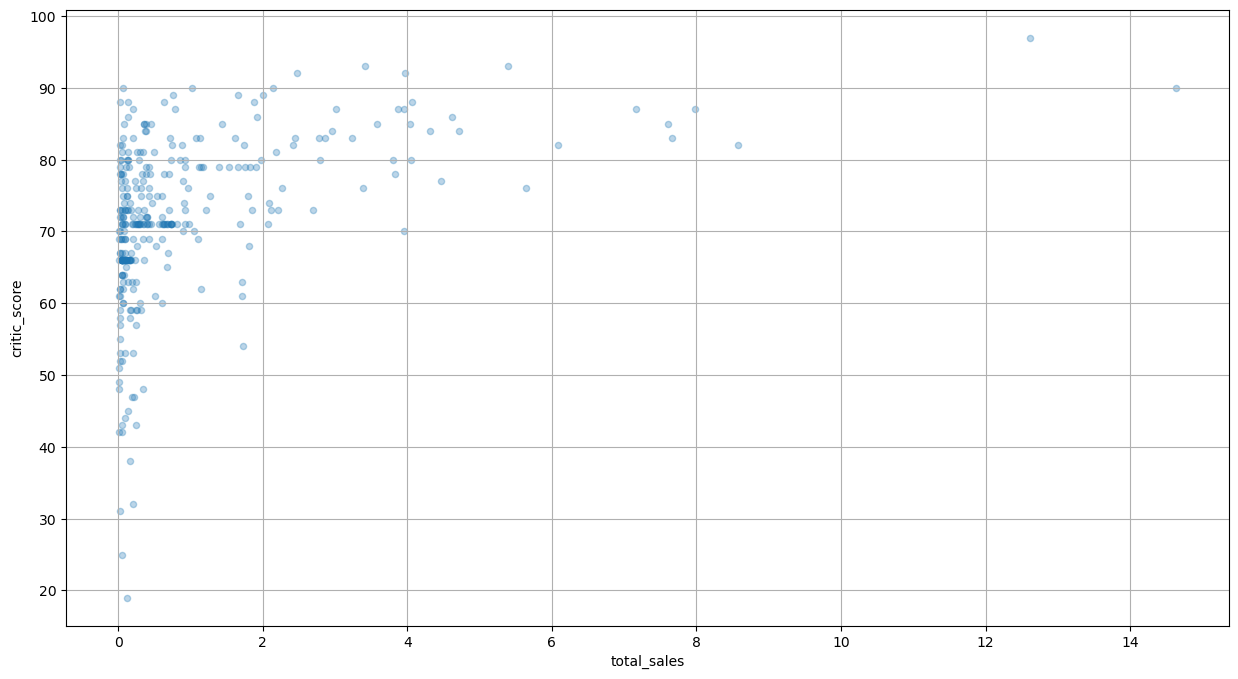

In [291]:
data.query('platform == "PS4"')\
.plot(x='total_sales', y='critic_score', kind='scatter', figsize=(15, 8), grid=True, alpha=0.3)

На диаграмме рассеяния ясно видны последствия замены попусков на медианные значения (горизонтальные полоски)!

#### Отзывы пользователей

Эту позицию мы не меняли по причине слабой корреляции показателей с общими продажами. Она и должна остаться слабой.

In [292]:
data.query('platform == "PS4"')['user_score'].corr(data.query('platform == "PS4"')['total_sales'])

-0.00026636485838546714

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

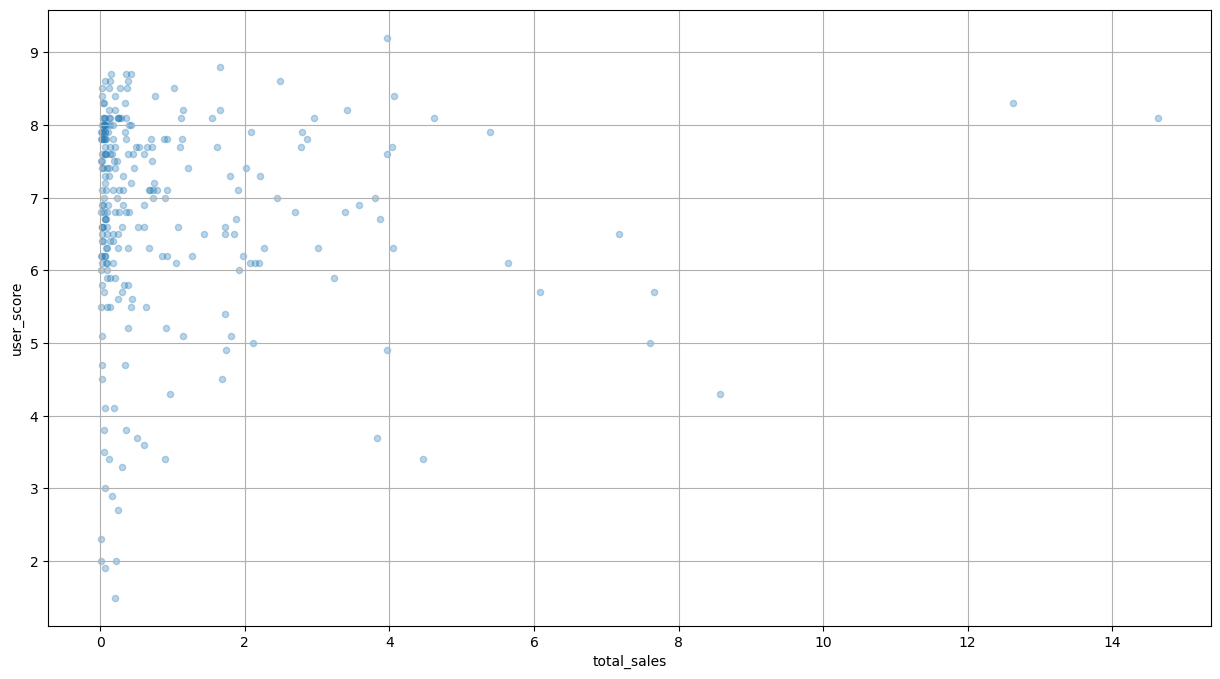

In [293]:
data.query('platform == "PS4"')\
.plot(x='total_sales', y='user_score', kind='scatter', figsize=(15, 8), grid=True, alpha=0.3)

По данной выбоке между оценками пользователей и суммарными продажами вообще нет связи!

#### Вывод по PS4

Вывод однозначен. Отзывы критиков оказывают несоизмеримо большее влияние на объемы продаж игр для PS4, нежели отзывы пользователей. Точнее будет сказать, что связи между отзывами пользователей и объемами продаж игр для PS4 вообще не прослеживается. 

### Влияние отзывов критиков и пользователей на объем продаж игр для других платформ

Посмотрим тоже самое для XOne

In [294]:
data.query('platform == "XOne"')['critic_score'].corr(data.query('platform == "XOne"')['total_sales'])

0.4378786361474904

In [295]:
data.query('platform == "XOne"')['user_score'].corr(data.query('platform == "XOne"')['total_sales'])

-0.07230310339069332

Очень похоже на показатели PS4.

Посмотрим для РС

In [296]:
data.query('platform == "PC"')['critic_score'].corr(data.query('platform == "PC"')['total_sales'])

0.24538500481348385

In [297]:
data.query('platform == "PC"')['user_score'].corr(data.query('platform == "PC"')['total_sales'])

-0.12992039340230432

Продажи игр для РС меньше зависят от отзывов критиков, чем продажи игр для приставок.

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам.

In [298]:
data.groupby('genre')['genre'].agg(['count']).sort_values(by = 'count', ascending=False)

,count
genre,
Action,811
Role-Playing,307
Sports,233
Shooter,227
Adventure,162
Misc,149
Racing,108
Fighting,96
Platform,76


Больше всего игр жанров "экшн" и  "спорт". Меньше всего - паззлов.

Сравним с распределением продаж по жанрам. 

In [299]:
data.groupby('genre')['total_sales'].agg(['sum']).sort_values(by = 'sum', ascending=False)

,sum
genre,
Action,436.50
Shooter,304.53
Role-Playing,180.27
Sports,179.06
Misc,83.44
Platform,60.13
Racing,53.34
Fighting,43.89
Simulation,34.44


Предсказуемо на первом месте по продажам "экшн-игры", на последнем - паззлы.

Интересно посмотреть "удельные" продажи - отношение общих продаж к количеству выпущенных игр. То есть - "среднюю продажу".

Создадим отдельую таблицу.

In [301]:
gen_stat = data.groupby('genre')['total_sales'].agg(['mean'])
gen_stat.sort_values(by = 'mean', ascending=False)

,mean
genre,
Shooter,1.341542
Platform,0.791184
Sports,0.768498
Role-Playing,0.587199
Misc,0.560000
Simulation,0.555484
Action,0.538224
Racing,0.493889
Fighting,0.457188


По удельным продажам безусловными лидерами являются "стрелялки" и "платформы" (что бы это ни значило). Игры "экшн", при всем многообразии выбора, продаются ниже среднего. И совсем непопулярны в народе "паззлы", "стратегии" и "приключения".

## Региональные особенности пользователей

### Северная Америка

#### Топ-5 платформ

In [308]:
na_pl = data.groupby('platform')['na_sales'].agg(['sum']).sort_values(by = 'sum', ascending=False)
na_pl

,sum
platform,
X360,140.32
PS4,108.71
PS3,103.51
XOne,93.08
3DS,55.28
WiiU,38.01
PC,19.21
Wii,18.14
PSV,10.95


Самые популярные в Северной Америке платформы - X360, PS4, PS3, XOne и 3DS.

Выведем то же самое в долях.

In [309]:
na_pl_tot = sum(na_pl['sum'])
na_pl['share'] = round(100 * na_pl['sum'] / na_pl_tot)
na_pl.sort_values(by = 'share', ascending=False)

,sum,share
platform,,
X360,140.32,24.0
PS4,108.71,19.0
PS3,103.51,18.0
XOne,93.08,16.0
3DS,55.28,9.0
WiiU,38.01,6.0
PC,19.21,3.0
Wii,18.14,3.0
PSV,10.95,2.0


Таким образом, в Северной Америке на долю платформы X360 приходится 24% проданых игр, на долю PS4 - 19% и т.д.

#### Топ-5 жанров

In [310]:
data.groupby('genre')['na_sales'].agg(['sum']).sort_values(by = 'sum', ascending=False)

,sum
genre,
Action,178.56
Shooter,144.65
Sports,81.26
Role-Playing,60.70
Misc,38.07
Platform,25.12
Fighting,19.75
Racing,17.16
Adventure,8.77


Топ-5 жанров в Северной Америке: "экшн", стрелялки, спорт, ролевые игры и "разное".

#### Влияние на продажи рейтинга ESRB

Найдем общее кооличество продаж по рейтингам и количество выпущенных игр по рейтингам. Поделим одно на другое, и чем больше получится число - тем сильнее влияние.

In [312]:
na_rt = data.groupby('rating')['na_sales'].agg(['sum'])
na_rt['count'] = data.groupby('rating')['rating'].agg(['count'])
na_rt['ratio'] = na_rt['sum'] / na_rt['count']
na_rt.sort_values(by = 'ratio', ascending=False)

,sum,count,ratio
rating,,,
M,257.62,549,0.469253
E10+,77.52,303,0.255842
E,161.94,663,0.244253
T,73.29,420,0.174500
RP,0.00,1,0.000000


Лучше всего в Северной Америке продаются игры для взрослых.

Посмотрим теперь на игры **без** рейтинга. Тоже оценим "удельные продажи".

In [313]:
data.query('rating.isna()')['na_sales'].agg(['sum']) / len(data.query('rating.isna()').index)

sum    0.046011
Name: na_sales, dtype: float64

Игры без рейтингов в Северной Америке практически не покупают. Но, как отмечалось выше, рейтинг ESRB предназначен прежде всего для рынка Северной Америки. Поэтому игры без рейтинга там скорее всего просто мало представлены.

### Европа

#### Топ-5 платформ

Выводим таблицу с долями.

In [314]:
eu_pl = data.groupby('platform')['eu_sales'].agg(['sum'])
eu_pl_tot = sum(eu_pl['sum'])
eu_pl['share'] = round(100 * eu_pl['sum'] / eu_pl_tot)
eu_pl.sort_values(by = 'share', ascending=False)

,sum,share
platform,,
PS4,141.04,28.0
PS3,107.08,21.0
X360,74.68,15.0
XOne,51.45,10.0
3DS,42.46,8.0
PC,37.91,8.0
WiiU,25.02,5.0
PSV,11.23,2.0
Wii,12.13,2.0


Таким образом, топ-5 платформ в Европе это: PS4 (с долей 28%), PS3 (21%), X360 (15%), XOne (10%) и 3DS (8%).

#### Топ-5 жанров

In [315]:
data.groupby('genre')['eu_sales'].agg(['sum']).sort_values(by = 'sum', ascending=False)

,sum
genre,
Action,159.48
Shooter,113.45
Sports,68.54
Role-Playing,46.74
Racing,27.24
Misc,25.80
Platform,20.94
Simulation,14.36
Fighting,10.79


Топ-5 жанров в Европе: "экшн", стрелялки, спорт, "ролевые игры" и гонки. Почти как в Северной Америке.

#### Влияние на продажи рейтинга ESRB

Найдем общее кооличество продаж по рейтингам и количество выпущенных игр по рейтингам. Поделим одно на другое, и чем больше получится число - тем сильнее влияние.

In [316]:
eu_rt = data.groupby('rating')['eu_sales'].agg(['sum'])
eu_rt['count'] = data.groupby('rating')['rating'].agg(['count'])
eu_rt['ratio'] = eu_rt['sum'] / eu_rt['count']
eu_rt.sort_values(by = 'ratio', ascending=False)

,sum,count,ratio
rating,,,
M,218.24,549,0.397523
E,158.07,663,0.238416
E10+,57.19,303,0.188746
T,56.21,420,0.133833
RP,0.04,1,0.040000


И в Европе хорошим спросом пользуются игры для взрослых игры для взрослых. Но не таким высоким, как в Северной Америке.

Теперь игры **без** рейтинга.

In [317]:
data.query('rating.isna()')['eu_sales'].agg(['sum']) / len(data.query('rating.isna()').index)

sum    0.036202
Name: eu_sales, dtype: float64

Показатель еще меньше, чем в Северной Америке. По всей видимости, разработчики игр рассматрривают Европу и Северную Америку как один рынок и получают для своих игр рейтинг ESRB.

### Япония

#### Топ-5 платформ

Выводим таблицу с долями.

In [318]:
jp_pl = data.groupby('platform')['jp_sales'].agg(['sum'])
jp_pl_tot = sum(jp_pl['sum'])
jp_pl['share'] = round(100 * jp_pl['sum'] / jp_pl_tot)
jp_pl.sort_values(by = 'share', ascending=False)

,sum,share
platform,,
3DS,86.53,50.0
PS3,33.50,19.0
PSV,18.73,11.0
PS4,15.84,9.0
WiiU,12.88,7.0
Wii,3.39,2.0
X360,1.45,1.0
PC,0.00,0.0
XOne,0.33,0.0


Топ-5 платформ в Японии это: 3DS (с долей 50%), PS3 (19%), PSV (11%), PS4 (9%) и WiiU (7%).

#### Топ-5 жанров

In [319]:
data.groupby('genre')['jp_sales'].agg(['sum']).sort_values(by = 'sum', ascending=False)

,sum
genre,
Role-Playing,58.43
Action,47.14
Misc,11.95
Simulation,10.06
Shooter,9.19
Fighting,8.88
Platform,8.55
Sports,6.93
Adventure,5.03


Топ-5 жанров в Японии: "ролевые игры", "экшн", "разное", "симуляции" и стрелялки. Особенный рынок, конечно. Но "экшн" любят везде!

#### Влияние на продажи рейтинга ESRB

Найдем общее кооличество продаж по рейтингам и количество выпущенных игр по рейтингам. Поделим одно на другое, и чем больше получится число - тем сильнее влияние.

In [320]:
jp_rt = data.groupby('rating')['jp_sales'].agg(['sum'])
jp_rt['count'] = data.groupby('rating')['rating'].agg(['count'])
jp_rt['ratio'] = jp_rt['sum'] / jp_rt['count']
jp_rt.sort_values(by = 'ratio', ascending=False)

,sum,count,ratio
rating,,,
E,86.83,663,0.130965
T,30.46,420,0.072524
M,22.65,549,0.041257
E10+,8.19,303,0.027030
RP,0.00,1,0.000000


Игры с рейтингом в Японии покукают в основном категории Е, то есть "для всех". М-игры здесь не очень популярны.

Теперь игры **без** рейтинга.

In [322]:
data.query('rating.isna()')['jp_sales'].agg(['sum']) / len(data.query('rating.isna()').index)

sum    0.066995
Name: jp_sales, dtype: float64

Сама цифра невелика, ниже, чем в Америке. Но для Японии это огромный показатель! Больше только у Е-игр. Очевидно, это японские игры для Японии. Им рейтинг ESRB не нужен.

### Выводы

1. По парку игровых платформ имеются заметные различия по всем трем регионам.

2. Жанровые предпочтения в Северной Америке и Европе очень похожи. У Японии есть особенности.

3. Минимальное влияние рейтинг ESRB оказывает на продажи в Японии. В то же время в Северной Америке и Европе больншство игр, представленных на рынке, по всей видимости, имеют рейтинг ESRB. В данных регионах предпочитают игры для взрослых.

## Проверка гипотез

### Рейтинги платформ

Поставлена задача проверить гипотезу, что "средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Наверное, имелось в виду "игр на платформах".

Нулевая гипотеза - что средние равны, альтернативная - что не равны.

Значимость устанавливаем в 5%.

Проверка - двухсторонняя, поскольку важно только равны средние, или не равны.

In [323]:
len(data.query('platform == "XOne"').index)

238

In [324]:
len(data.query('platform == "PC"').index)

228

Срезы по платформам получатся достаточно большие - можно применять t-тест. Но разного размера, поэтому аргумент equal_var надо задать False.

Друг от друга срезы не зависят.

In [325]:
from scipy import stats as st

alpha = .05 # если p-value меньше альфы - отвергает гипотезу

results = st.ttest_ind(
    data.query('platform == "XOne"')['user_score'], 
    data.query('platform == "PC"')['user_score'],
    equal_var=False, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.6833885786794699
Не получилось отвергнуть нулевую гипотезу


Таким образом, **мы принимаем гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые**.

### Рейтинги жанров

Поставлена задача проверить гипотезу, что "средние пользовательские рейтинги жанров Action и Sports разные".

Как и в прошлом случае, нулевая гипотеза - что средние равны, альтернативная - что не равны.

Значимость устанавливаем в 5%.

Проверка - двухсторонняя, поскольку важно только равны средние, или не равны.

In [317]:
len(data.query('genre == "Action"').index)

811

In [318]:
len(data.query('genre == "Sports"').index)

233

Срезы по платформам получатся достаточно большие - можно применять t-тест. Но - разного размера, поэтому аргумент equal_var надо задать False.

Друг от друга срезу не зависят.

In [326]:
alpha = .05 # если p-value меньше альфы - отвергает гипотезу

results = st.ttest_ind(
    data.query('genre == "Action"')['user_score'], 
    data.query('genre == "Sports"')['user_score'],
    equal_var=False, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 1.443710266756117e-19
Отвергаем нулевую гипотезу


Таким образом, мы отвергаем нулевую гипотезу и **принимаем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные**.

Посмотрим, кстати, что там...

In [327]:
data.query('genre == "Action"')['user_score'].mean()

6.839489194499026

In [328]:
data.query('genre == "Sports"')['user_score'].mean()

5.476881720430107

Они реально разные...

## Резюме

1. ***Предобработка***

   1.1. В части жанров игр и объемах их продаж исходная база данных оказалась практивески безупречной. Ни особых аномалий, ни пропусков выявлено не было.
   
   1.2. В то же время, имеющиеся пропуски в данных по годам выпуска игр, очевидно, не могут быть корректно восстановлены по полным данным, перечисленным в п.1. В самом деле, на уровне здравого смысла понятно, что год выпуска игры никак не зависит от объемов продаж игры и ее жанра.
   
   1.3. Было проверено предположение, что пропуски в оценках игры можно восстановить исходя из объемов ее продаж. Для оценок критиков этот механизм был признан приемлемым, для оценок пользователей - нет (низкая корреляция, в разрезе по некоторым платформам практически нулевая).
   
   1.4. Данные по возрастным рейтингам частично были восстановлены по данных о жанре игр. Алгоритм такой: если большинство игр жанра "Ж", для которых известен возрастной рейтинг, имеют возрастной рейтинг "Р", мы ставим рейтинг "Р" всем играм жанра "Ж", которые в исходной базе рейтинга не имели.
   
   1.5. Параллельно была выяснена природа возрастного рейтинга в нашей базе данных и сделан вывод, что для целой группы игр отсутствие рейтинга - вполне закономерное явление.
   
   1.6. Часть пропусков данных по годам выпуска, оценкам и возрастному рейтингу игр была заменена на соотвествующие значения, имевшиеся по тем же играм, выпущенным для других платформ.
   
   1.7. На стадии предобработки данных из базы данных были исключены игры, вышедшие до 2000 года, а также игры с большим количеством пропусков данных и минимальными продажами (за исключением новейших игр, вышедших в 2016 году). Эти данные были оценены как незначимые для целей настоящего исследования.
   


2. ***Исследовательский анализ***
    
    2.1. Начало роста рынка компьютерных игр относится к 1993-1994 гг. На пике, в 2008-2009 гг., в год выходило более 1400 новых игр. Периодически рост рынка сменялся падением, реагируя на глобальные экономические кризисы. С 2012-2013 годов рынок новых игр стабилизировался на уровне, который, примерно, сохраняется и на конец 2016 года.

   2.2. По накопленным продажам лидируют платформы, обозначенные в нашей базе данных, как PS2, X360, PS3, Wii и DS. При этом новых игр для указанных платформ в последние годы либо почти не выпускается, либо вообще не выпускается. То есть с точки зрения будущих продаж игр эти платформы никакого интереса не представляют.
   
   2.3. Анализ данных в разрезе платформ показал, что жизненный цикл подавляющего большинства платформ (с точки зрения продавца игр) конечен и составляет порядка 10-11 лет. При этом жизненный цикл каждой платформы делится на три примерно равные части: рост, максимальный уровень и падение числа новых релизов и, соотвественно, продаж игр.
   
   2.4. Основная задача настоящего исследования, напомним, заключалась в формировании базы данных для прогноза продаж игр на 2017 год. По сути, рчеь идет о "глубине" базы, о том, за сколько лет данные реально полезны для прогнозов на следующий год. С четом всех факторов, **мы рекомендуем оставить в итоговой базе данные с 2012 года**.
   
   2.5. В качестве **самых перспективных платформ**, относительно продаж игр в 2017 году, мы выделили платформы, обозначенные в нашей базе как **PS4 и XOne**. Они являются самыми молодыми платформами. 2017 год будет их пятым годом на рынке, и, статически, это - период максимальных продаж.
   
   2.6. Также ставилась задача оценить влияние отзывов критиков и пользователей об игре на объемы ее продаж. Мы пришли к выводу, что отзывы критиков оказывают несоизмеримо большее влияние на объемы продаж игр, нежели отзывы пользователей. По многим платформам связи между отзывами пользователей и объемами продаж игр вообще не прослеживается.
   
   2.7. Анализ продаж игр в региональном разрезе выявил следующее:
   - по парку игровых платформ имеются заметные различия между Северной Америкой, Европой и Японией;
   - жанровые предпочтения в играх в Северной Америке и Европе очень похожи; у Японии есть особенности;
   - рейтинг ESRB оказывает минимальное влияние на продажи в Японии; в Северной Америке и Европе большинство игр, представленных на рынке, по всей видимости, имеют рейтинг ESRB;
   - в Северной Америке и Европе лучше всего покупают игры для взрослых; по Японии такого вывода сделать нельзя, поскольку на местном рынке продается много игр без рейтинга ESRB.



3. ***Статистический анализ***

    3.1. Проверка гиптезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". **Гипотеза принята**.
    
    3.2. Проверка гиптезы "Средние пользовательские рейтинги жанров Action и Sports разные". **Гипотеза принята**.